In [1]:
# Imports
# !pip install torchinfo
import torch
import torch.nn as nn
import torch.utils.data as Data
from torchvision import datasets, transforms
from torchinfo import summary
import matplotlib.pyplot as plt
import os
# os.environ['OPENBLAS_NUM_THREADS'] = '1'
import numpy as np
import random
import time
import CompMethods_V2 as TP
import DataSetting_v2 as DS

In [5]:
# %%html
# <style>
# .cell-output-ipywidget-background {
#     background-color: transparent !important;
# }
# :root {
#     --jp-widgets-color: var(--vscode-editor-foreground);
#     --jp-widgets-font-size: var(--vscode-editor-font-size);
# }  
# </style>

### Loader

In [2]:
gpu = 7
date = '240523'

In [3]:
datadir = f'../dataset/0509/make19_30-finished/'
data = DS.ModalityLoader(data_dir=datadir, modalities={'tag', 'csi', 'rimg'})
train = data.profiling({'T01', 'T02'})
test = data.profiling({'T03', 'T04'})

Loading from ../dataset/0509/make19_30-finished/


  0%|          | 0/10 [00:00<?, ?it/s]

Profiled by {'T02', 'T01'}
Profiled by {'T04', 'T03'}


In [ ]:
transform = transforms.Compose([
    transforms.Resize([128, 128]),
    transforms.ToTensor()])
train_set = DS.MyDataset('tv', train, transform=transform)
test_set = DS.MyDataset('test', test, transform=transform)
train_loader, valid_loader = DS.DataSplitter(train_set).split_loader()
test_loader = DS.DataSplitter(test_set, 1).gen_loader()

### Wi2Vi

In [4]:
transform = transforms.Compose([
    transforms.Resize([240, 320]),
    transforms.ToTensor()])
train_set = DS.MyDataset('tv', train, transform=transform)
test_set = DS.MyDataset('test', test, transform=transform)
train_loader, valid_loader = DS.DataSplitter(train_set).split_loader()
test_loader = DS.DataSplitter(test_set, 1).gen_loader()

Generating loaders...
 tv len 5490, distributed=False
 exported train loader of len 68, batch size 64
 exported valid loader of len 17, batch size 64

Generating loaders...
 test len 5069, distributed=False
 exported loader of len 5069, batch size 1


In [5]:
# Model and Loss
wi2vi = TP.Wi2Vi()
torch.cuda.set_device(gpu)

Wi2Vi_trainer = TP.CompTrainer(name='Wi2Vi', mask=False,
                              networks=[wi2vi],
                 lr=1e-4, epochs=10, cuda=gpu,
                 train_loader=train_loader, valid_loader=valid_loader, test_loader=test_loader, notion=f'{date}_Wi2Vi')

Wi2Vi train: epoch=1/999, batch=0/68, loss=1281261.2500, current best valid loss=inf    
Wi2Vi train: epoch=1/999, batch=5/68, loss=848613.9375, current best valid loss=inf    
Wi2Vi train: epoch=1/999, batch=10/68, loss=812887.8750, current best valid loss=inf    
Wi2Vi train: epoch=1/999, batch=15/68, loss=799092.0625, current best valid loss=inf    
Wi2Vi train: epoch=1/999, batch=20/68, loss=778784.0000, current best valid loss=inf    
Wi2Vi train: epoch=1/999, batch=25/68, loss=773250.1250, current best valid loss=inf    
Wi2Vi train: epoch=1/999, batch=30/68, loss=761118.5625, current best valid loss=inf    
Wi2Vi train: epoch=1/999, batch=35/68, loss=769121.1875, current best valid loss=inf    
Wi2Vi train: epoch=1/999, batch=40/68, loss=763872.5625, current best valid loss=inf    
Wi2Vi train: epoch=1/999, batch=45/68, loss=753672.6250, current best valid loss=inf    
Wi2Vi train: epoch=1/999, batch=50/68, loss=749840.3125, current best valid loss=inf    
Wi2Vi train: epoch=1/9

<Figure size 432x288 with 0 Axes>

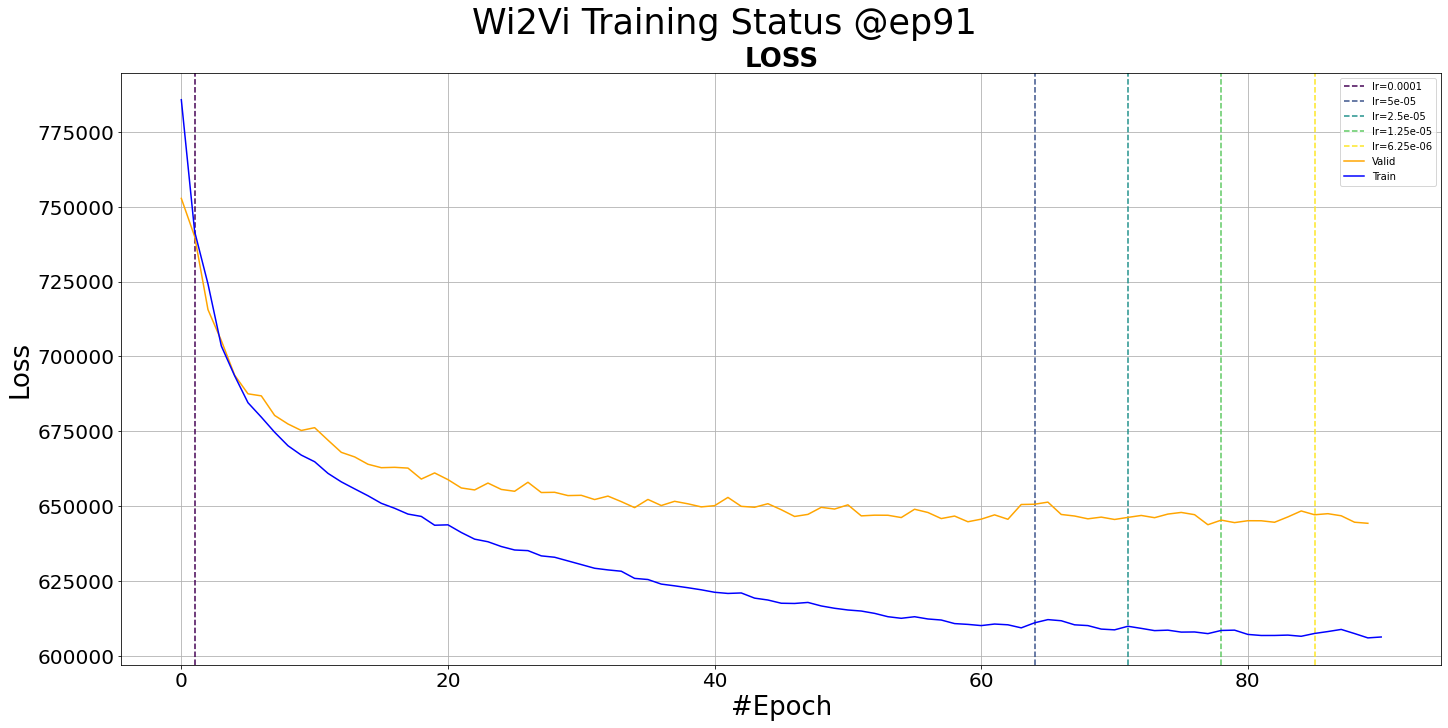

Wi2Vi test: sample=65/68, loss=8410.8887     
Test finished. Average loss={'LOSS': 9503.489458869486}

Total training time: 24.42919135093689 sec


<Figure size 1440x720 with 0 Axes>

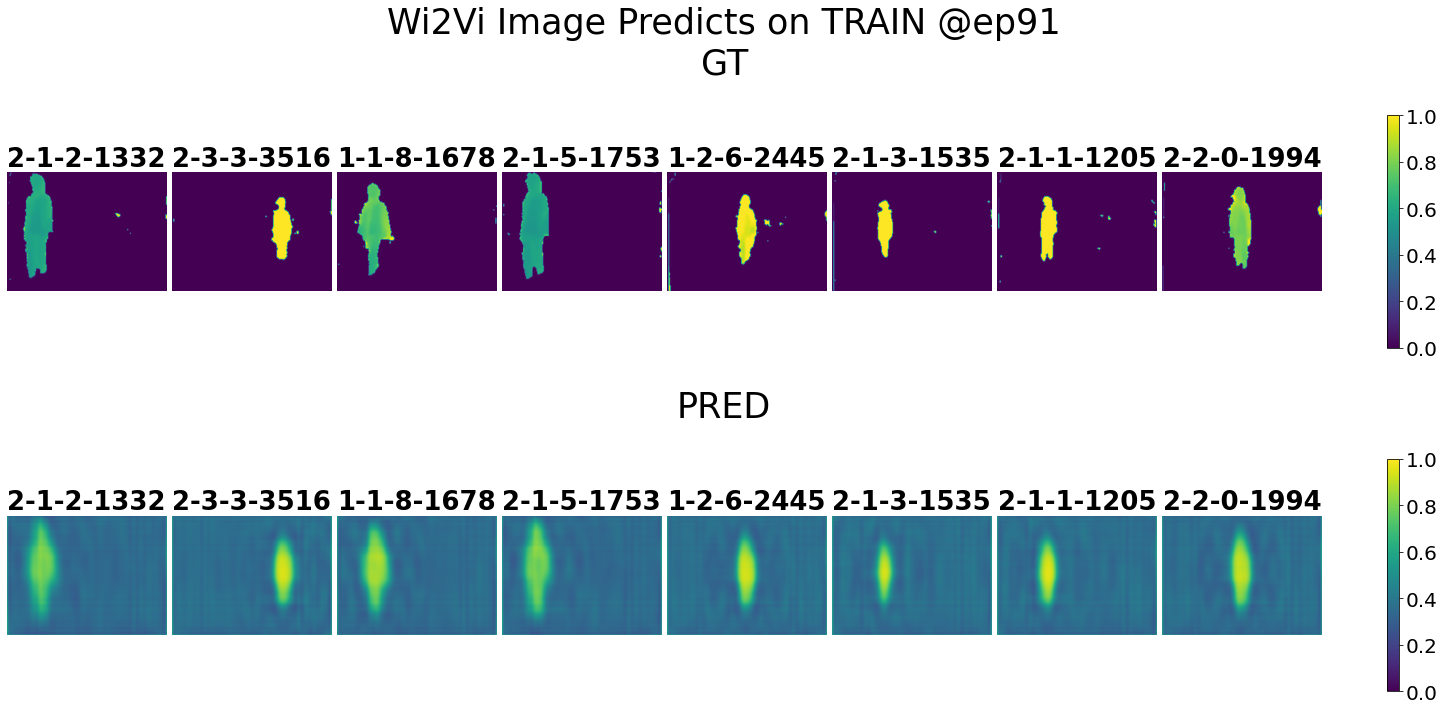

<Figure size 1440x720 with 0 Axes>

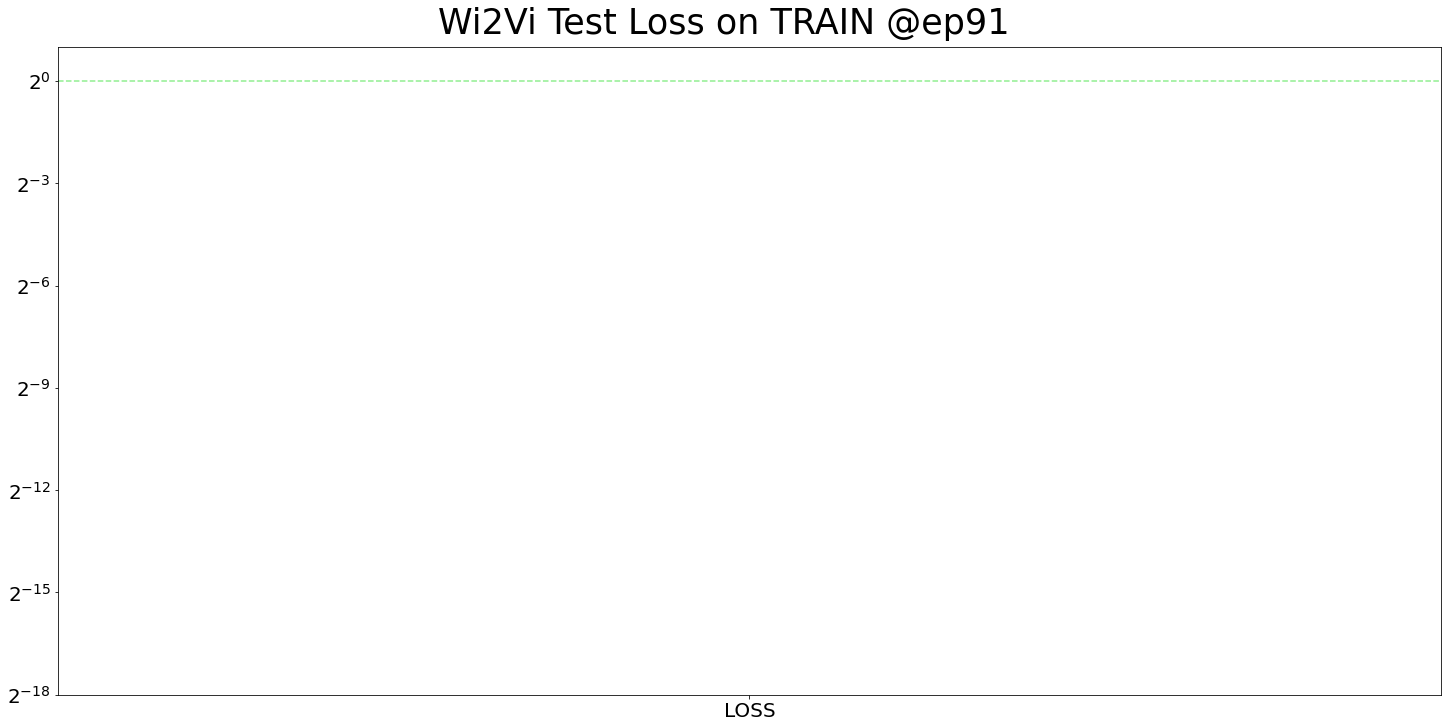

<Figure size 1440x720 with 0 Axes>

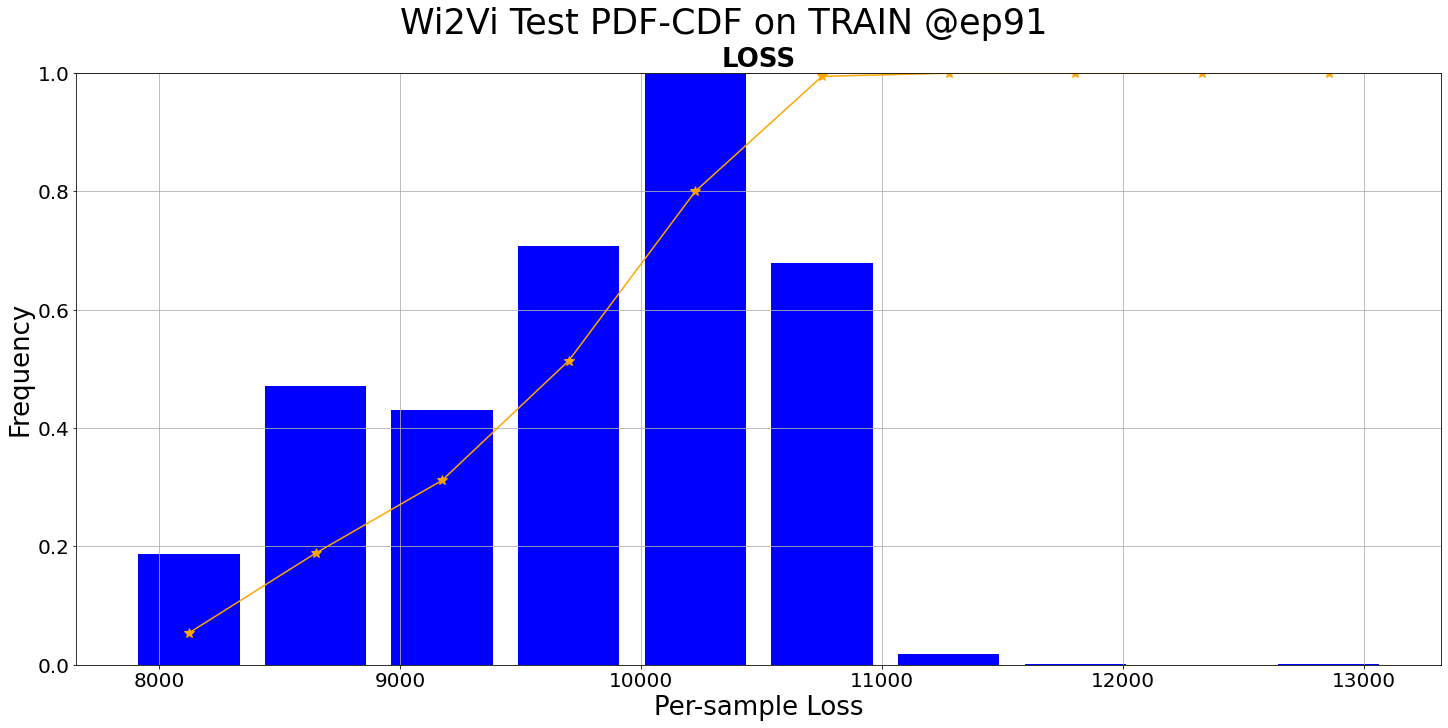

Wi2Vi test: sample=5065/5069, loss=12426.6582    
Test finished. Average loss={'LOSS': 11258.20870059584}

Total training time: 44.29711890220642 sec


<Figure size 1440x720 with 0 Axes>

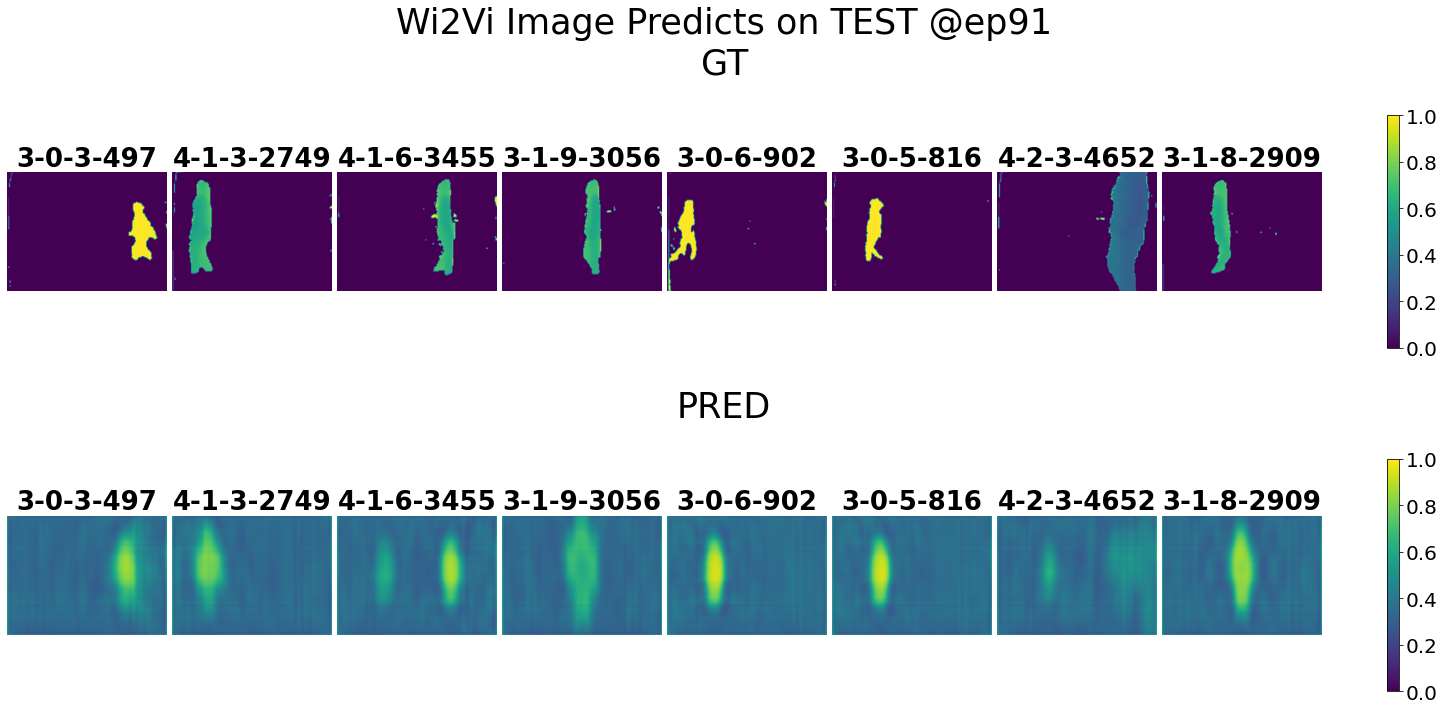

<Figure size 1440x720 with 0 Axes>

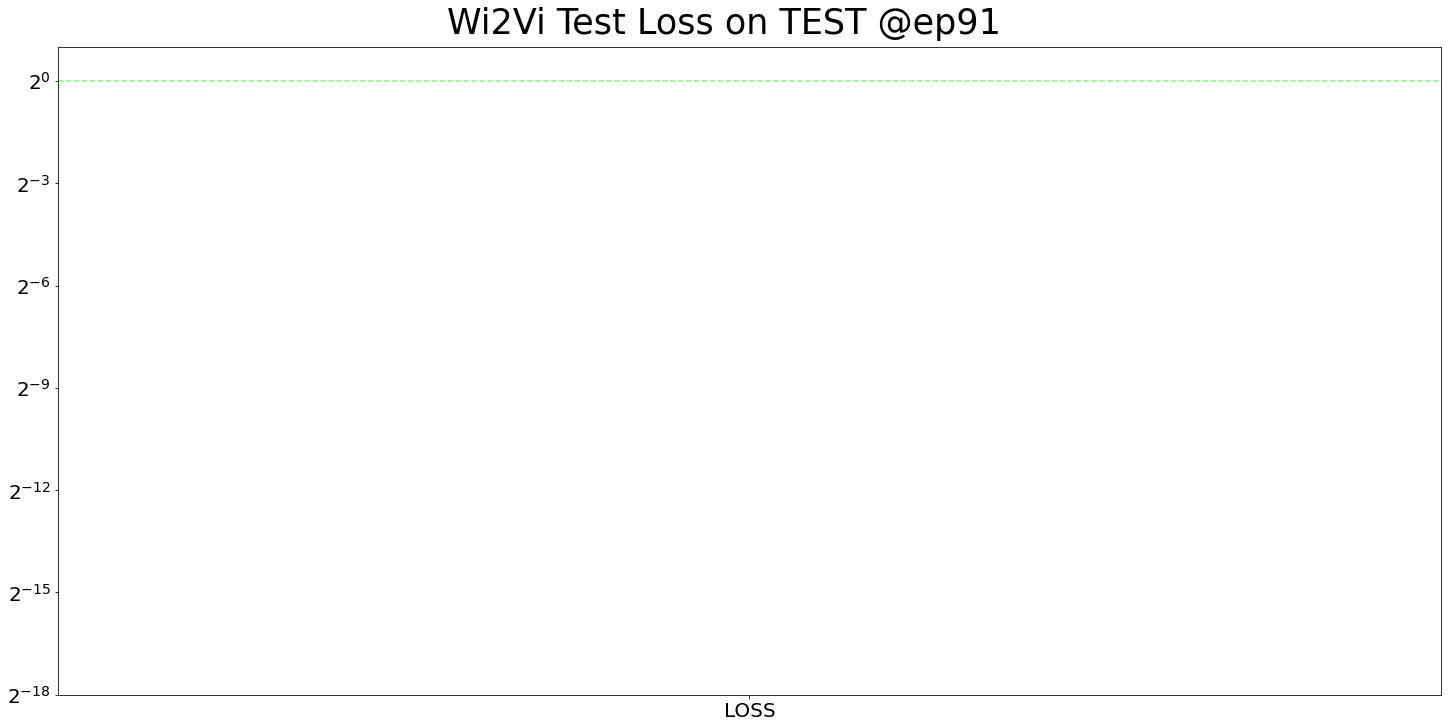

<Figure size 1440x720 with 0 Axes>

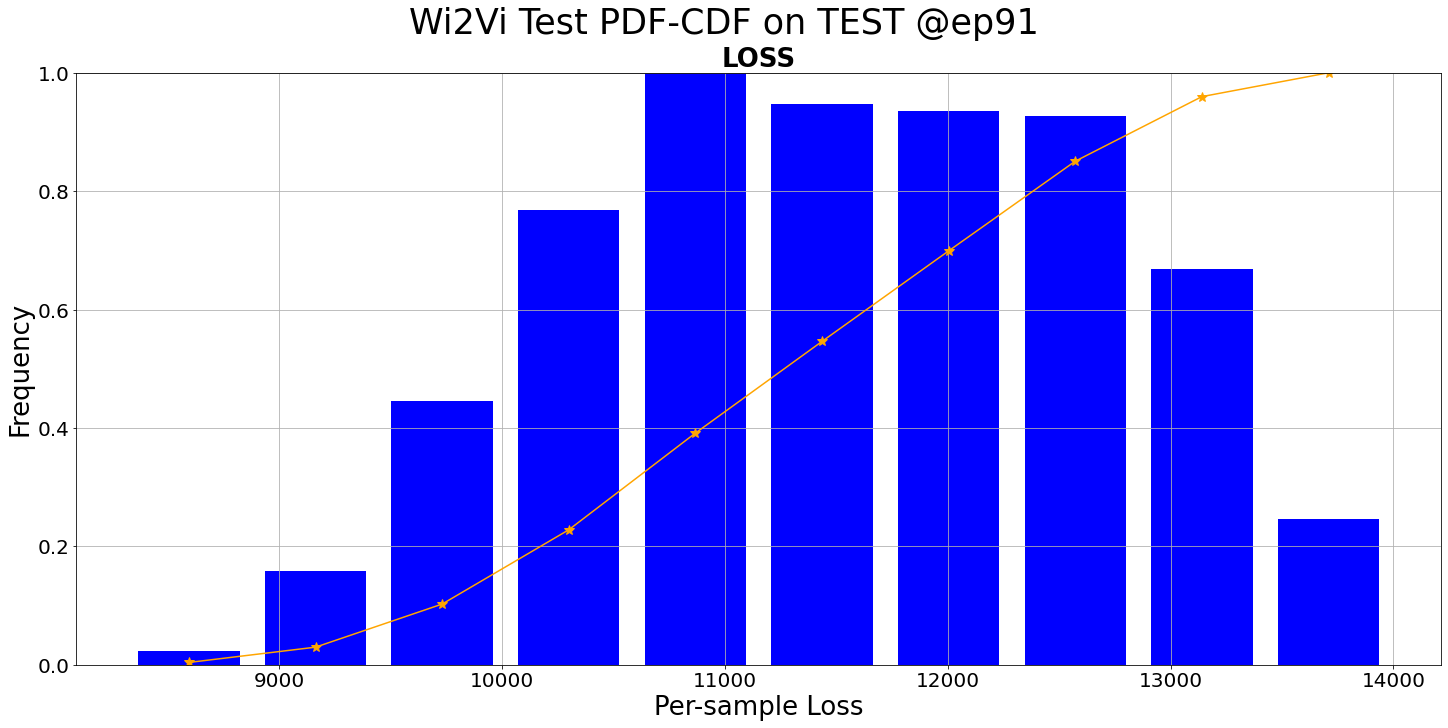

Saving pred including GT, PRED, TAG...Done

Wi2Vi schedule Completed!


In [6]:
# Training and Testing
%matplotlib inline
wi2vi_trained = Wi2Vi_trainer.schedule()

### AutoEncoder

In [8]:
torch.cuda.set_device(gpu)
ae = TP.AutoEncoder(latent_dim=16)
AE_trainer = TP.CompTrainer(name='AE', mode='ae', mask=False,
                            networks=[ae],
                            lr=1e-4, epochs=10, cuda=gpu,
                            train_loader=train_loader, valid_loader=valid_loader, test_loader=test_loader, notion=f'{date}_AE_2')

AE train: epoch=1/999, batch=0/68, loss=296028.3438, current best valid loss=inf    
AE train: epoch=1/999, batch=5/68, loss=287219.3750, current best valid loss=inf    
AE train: epoch=1/999, batch=10/68, loss=277975.6250, current best valid loss=inf    
AE train: epoch=1/999, batch=15/68, loss=189027.8750, current best valid loss=inf    
AE train: epoch=1/999, batch=20/68, loss=51035.4844, current best valid loss=inf    
AE train: epoch=1/999, batch=25/68, loss=44680.7266, current best valid loss=inf    
AE train: epoch=1/999, batch=30/68, loss=45803.7969, current best valid loss=inf    
AE train: epoch=1/999, batch=35/68, loss=45110.8047, current best valid loss=inf    
AE train: epoch=1/999, batch=40/68, loss=42677.1992, current best valid loss=inf    
AE train: epoch=1/999, batch=45/68, loss=43902.6719, current best valid loss=inf    
AE train: epoch=1/999, batch=50/68, loss=42928.7500, current best valid loss=inf    
AE train: epoch=1/999, batch=55/68, loss=42472.1055, current be

<Figure size 432x288 with 0 Axes>

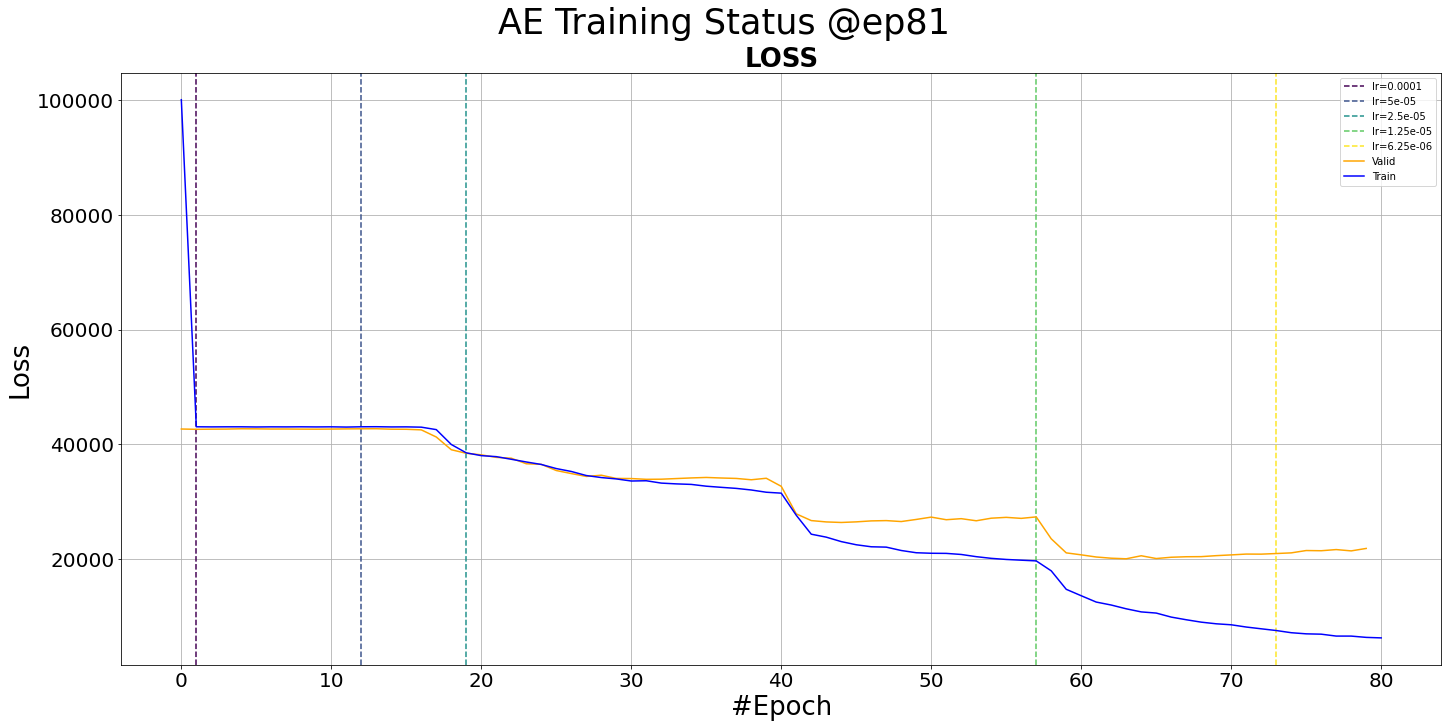

AE test: sample=65/68, loss=51.2424     
Test finished. Average loss={'LOSS': 97.27367443635183}

Total training time: 11.238563537597656 sec


<Figure size 1440x720 with 0 Axes>

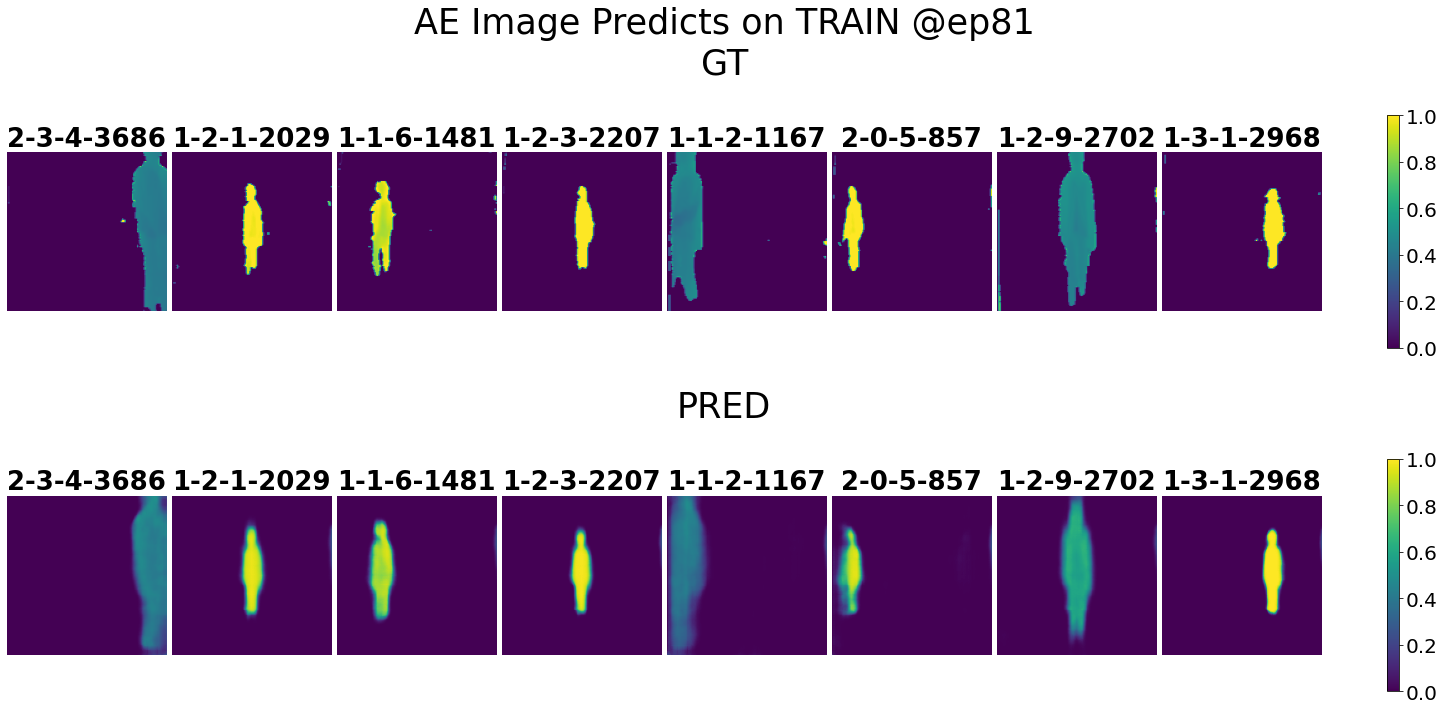

<Figure size 1440x720 with 0 Axes>

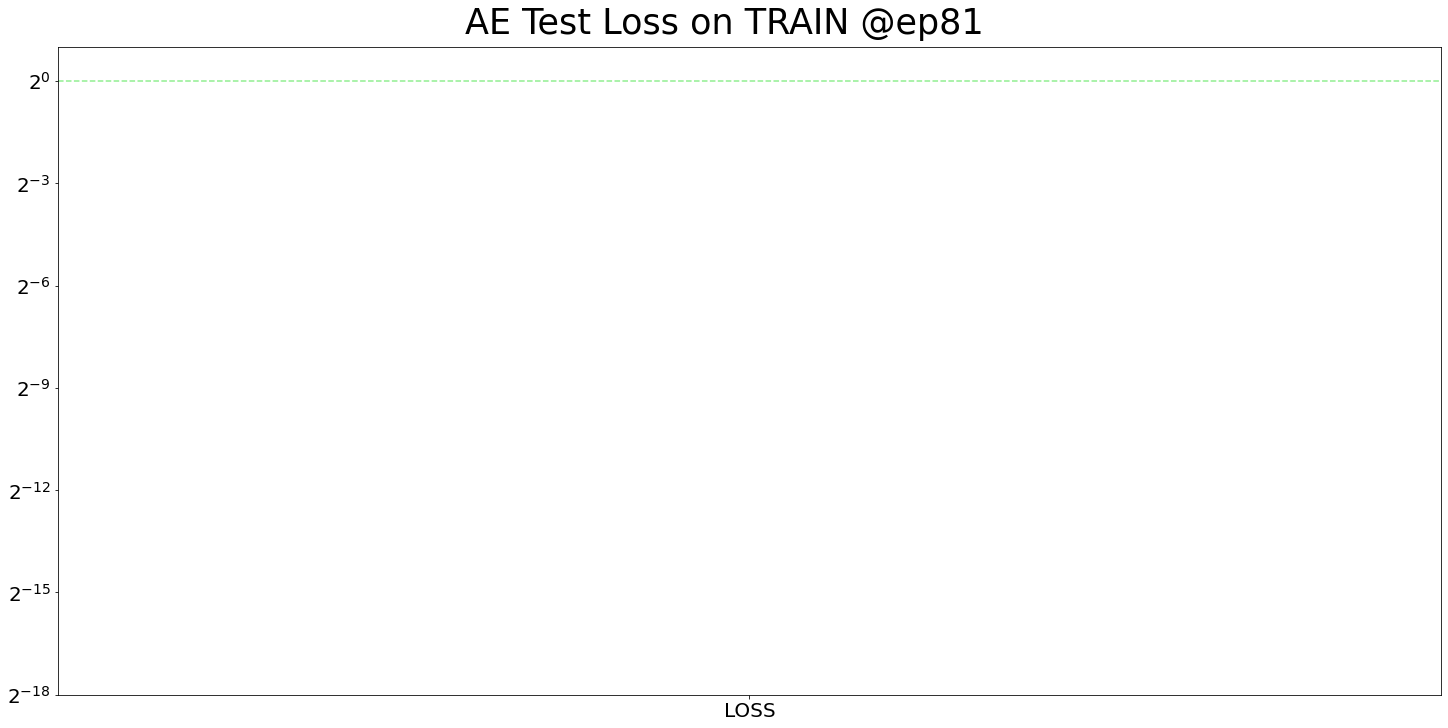

<Figure size 1440x720 with 0 Axes>

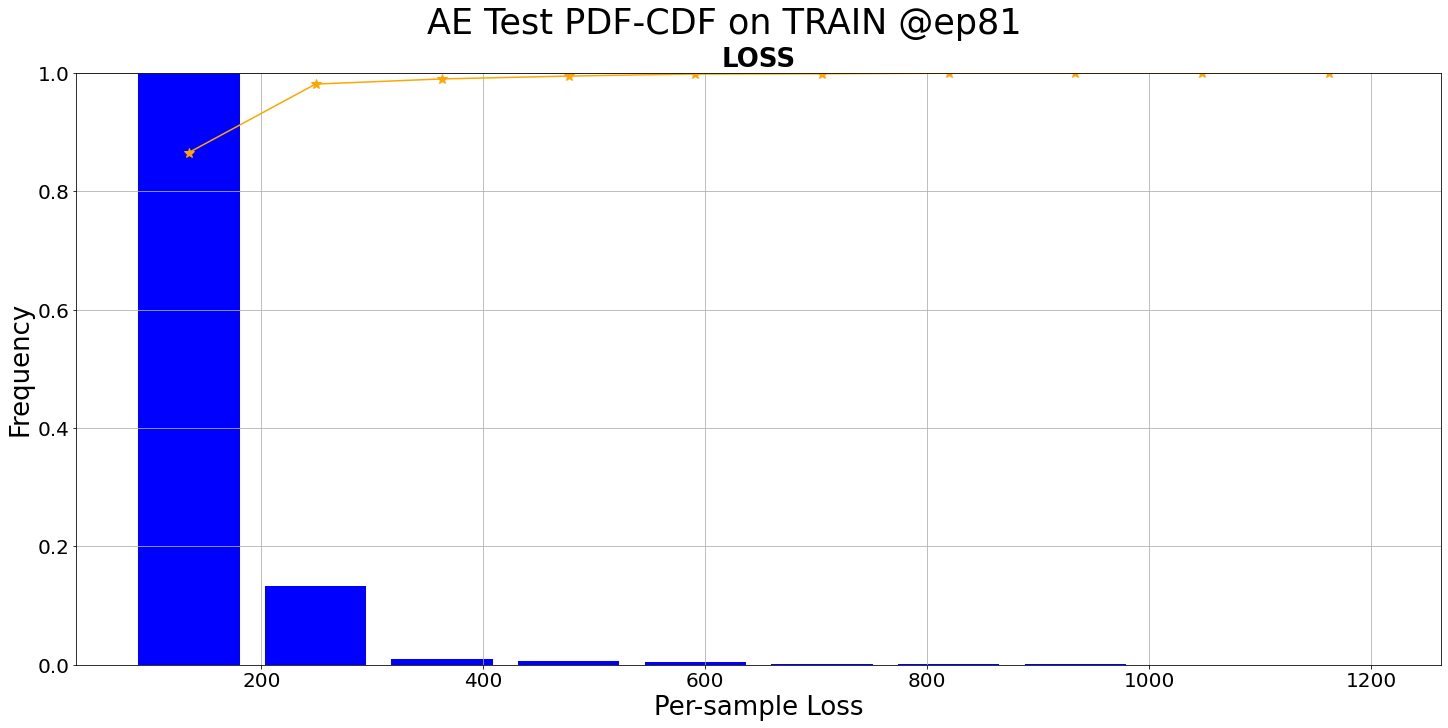

<Figure size 1440x720 with 0 Axes>

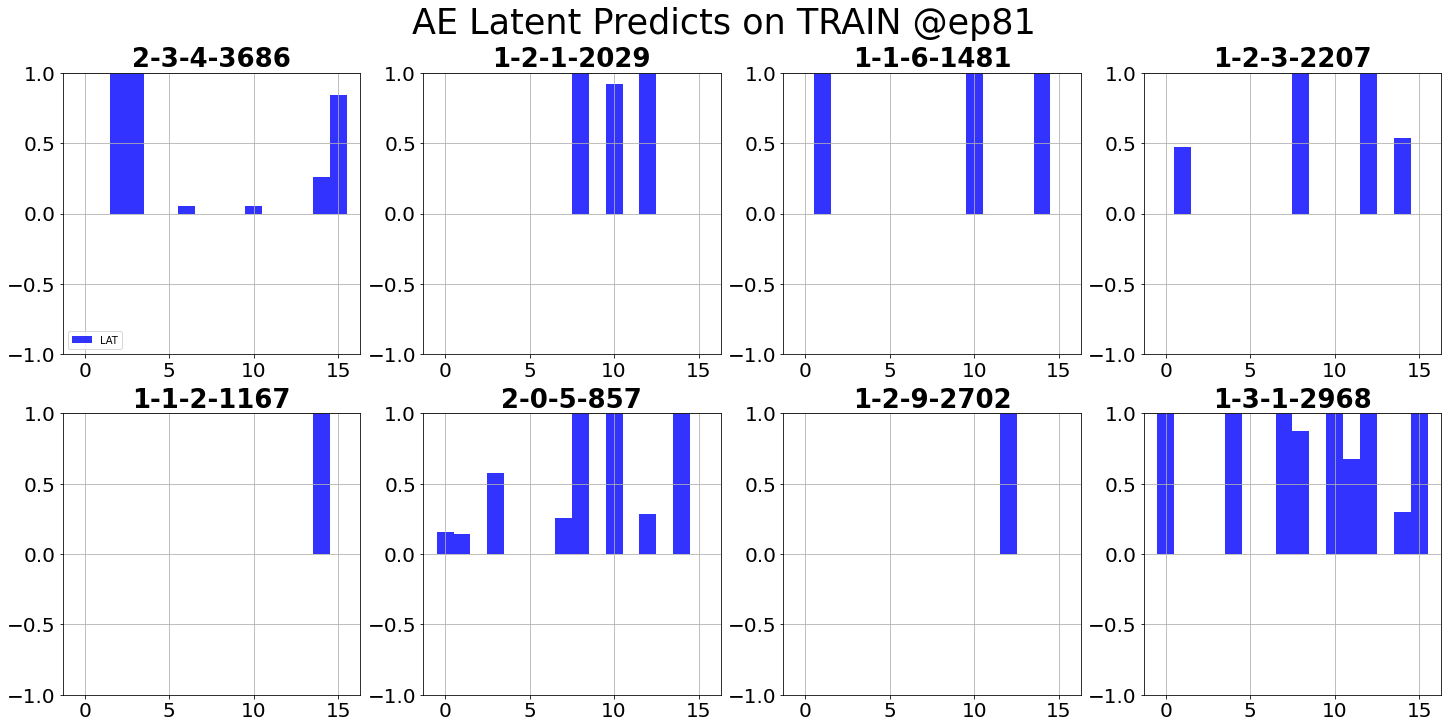

AE test: sample=5065/5069, loss=481.1870     
Test finished. Average loss={'LOSS': 659.7883523085762}

Total training time: 25.05388617515564 sec


<Figure size 1440x720 with 0 Axes>

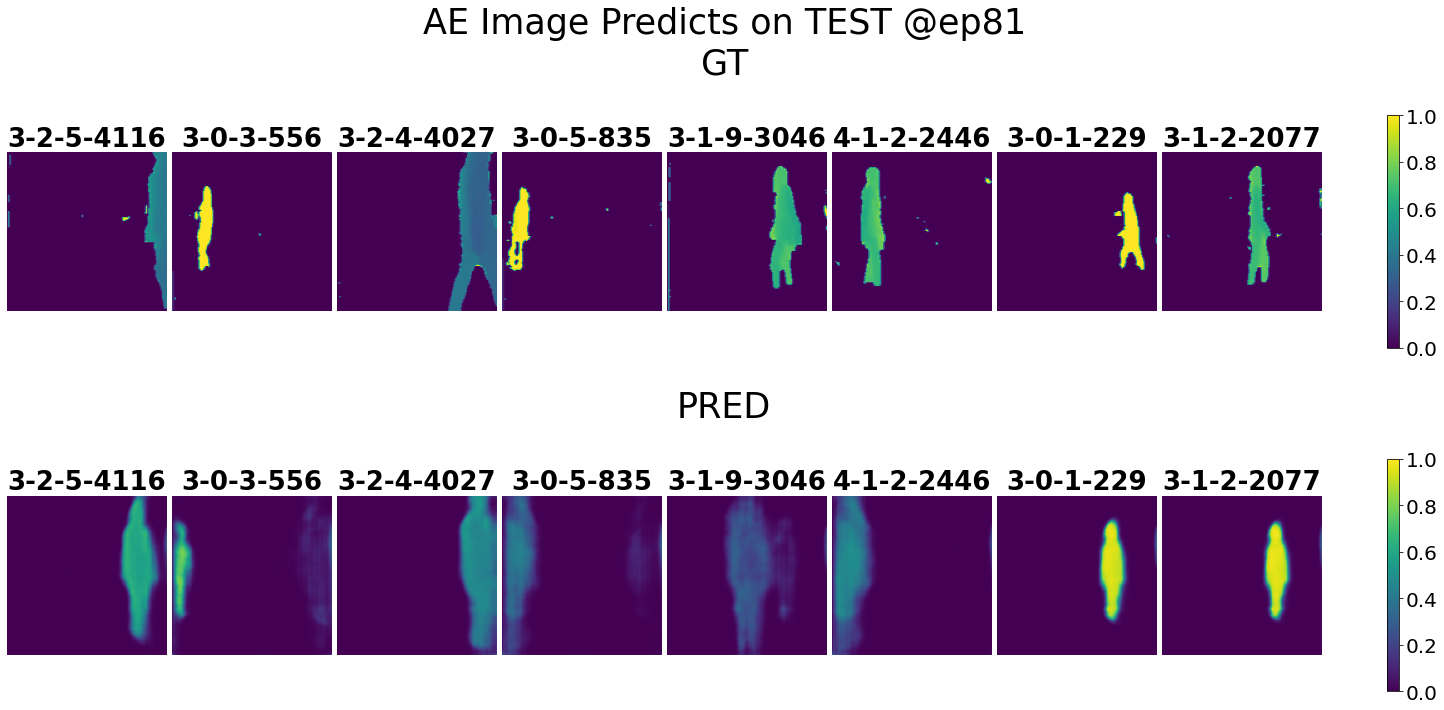

<Figure size 1440x720 with 0 Axes>

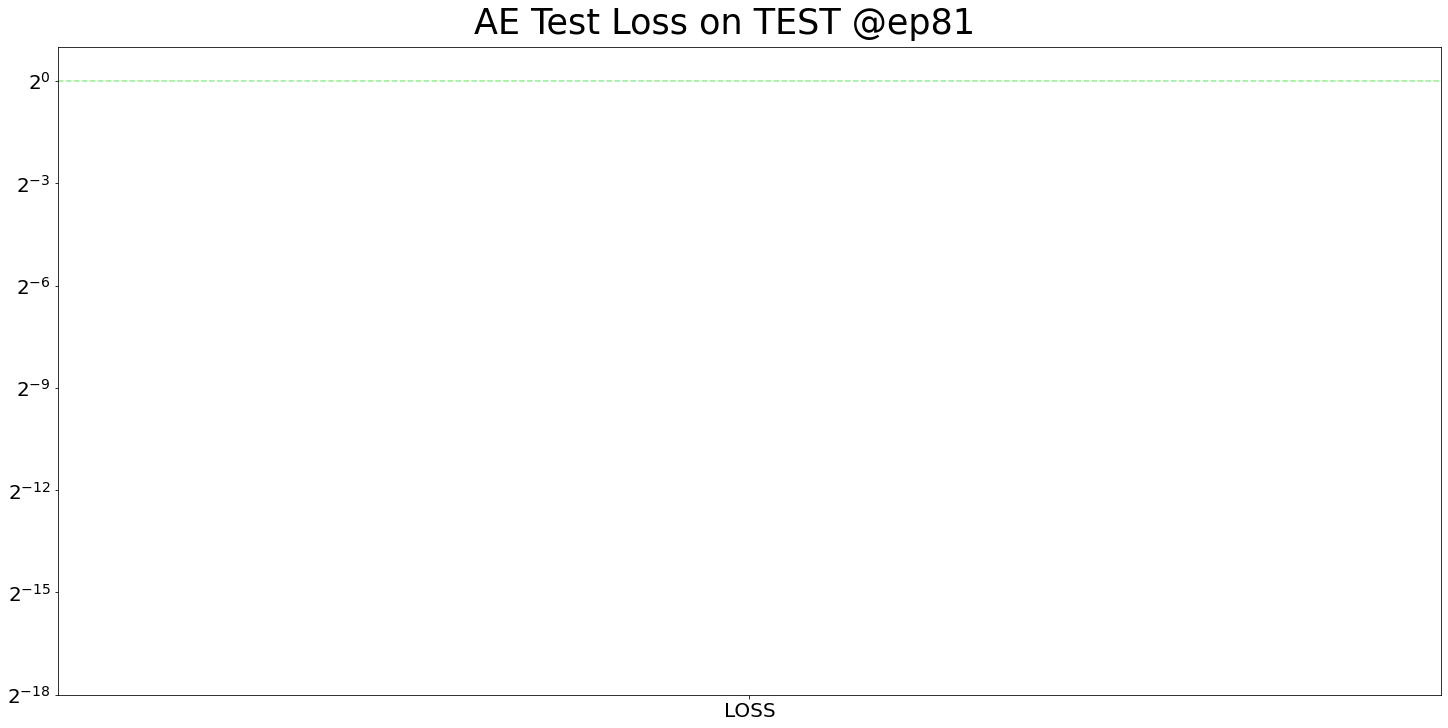

<Figure size 1440x720 with 0 Axes>

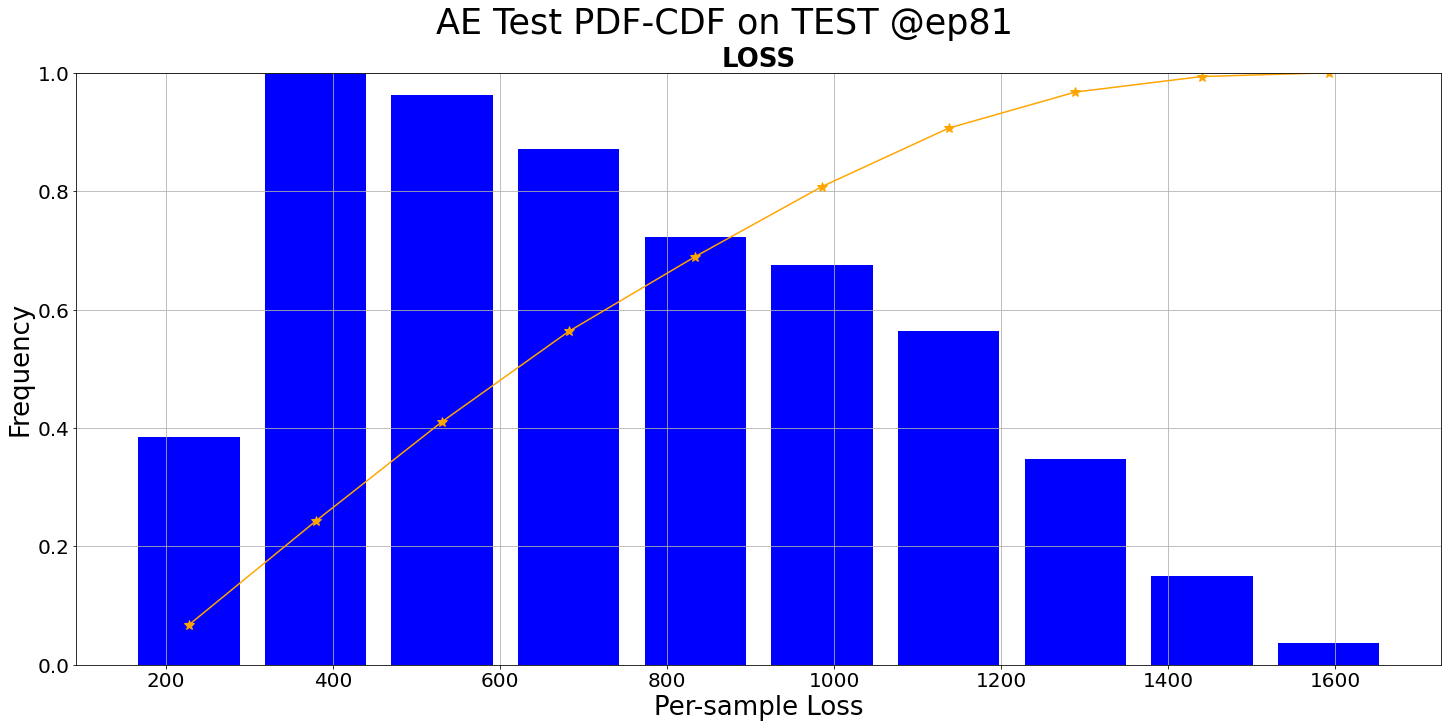

<Figure size 1440x720 with 0 Axes>

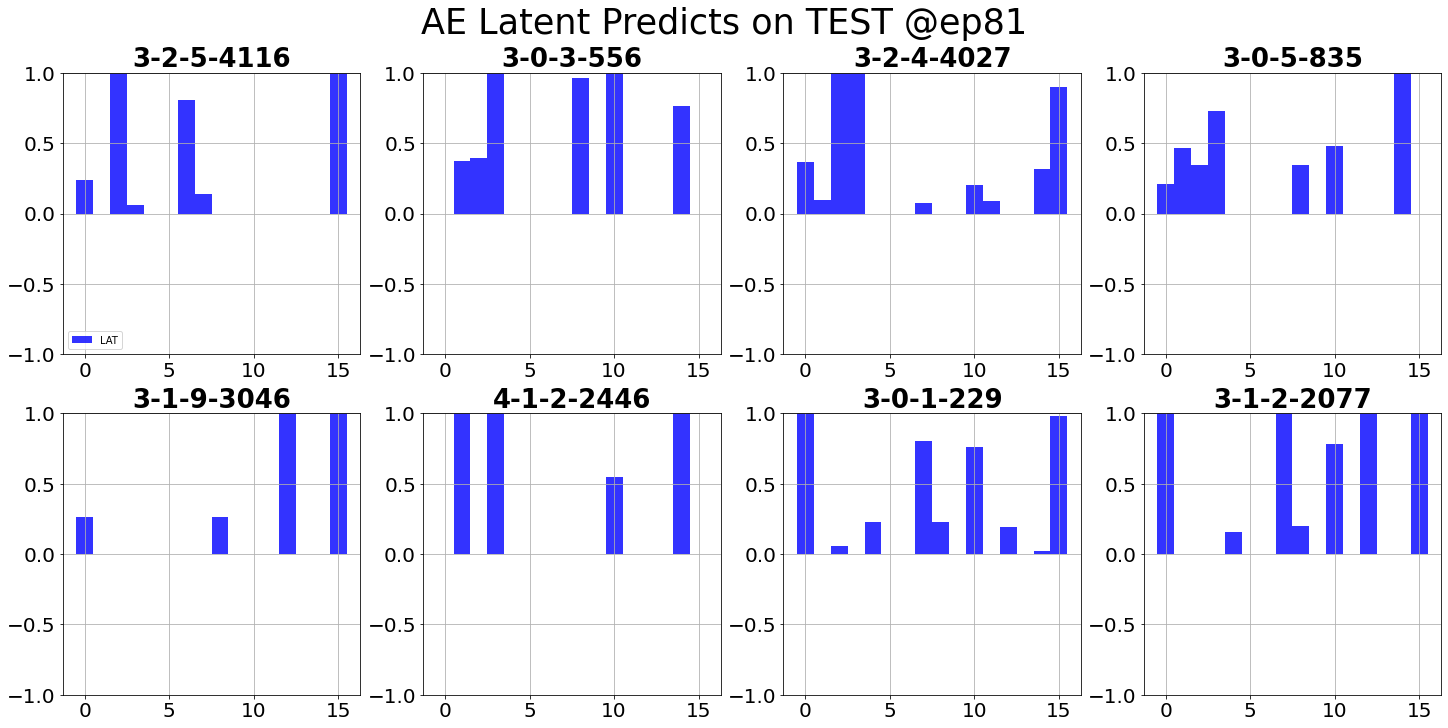

Saving pred including GT, PRED, LAT, TAG...Done

AE schedule Completed!


In [9]:
# Training and Testing
%matplotlib inline
AE_trainer.lr = 1e-4
ae_trained = AE_trainer.schedule(lr_decay=True)

### VAE

In [7]:
torch.cuda.set_device(gpu)
imgdecoder = TP.ImageDecoder(latent_dim=16)
csiencoder = TP.CSIEncoder(out_length=32)
VAE_trainer = TP.CompTrainer(name='VAE', mode='vae', mask=False,
                              networks=[csiencoder, imgdecoder],
                 lr=1e-4, epochs=10, cuda=gpu,
                 train_loader=train_loader, valid_loader=valid_loader, test_loader=test_loader, notion=f'{date}_VAE')

VAE train: epoch=1/999, batch=0/68, loss=3664.8059, current best valid loss=inf    
VAE train: epoch=1/999, batch=5/68, loss=3505.1018, current best valid loss=inf    
VAE train: epoch=1/999, batch=10/68, loss=2674.2905, current best valid loss=inf    
VAE train: epoch=1/999, batch=15/68, loss=1031.0444, current best valid loss=inf    
VAE train: epoch=1/999, batch=20/68, loss=777.4733, current best valid loss=inf    
VAE train: epoch=1/999, batch=25/68, loss=722.9883, current best valid loss=inf    
VAE train: epoch=1/999, batch=30/68, loss=659.2927, current best valid loss=inf    
VAE train: epoch=1/999, batch=35/68, loss=653.5322, current best valid loss=inf    
VAE train: epoch=1/999, batch=40/68, loss=699.8845, current best valid loss=inf    
VAE train: epoch=1/999, batch=45/68, loss=645.3179, current best valid loss=inf    
VAE train: epoch=1/999, batch=50/68, loss=632.0347, current best valid loss=inf    
VAE train: epoch=1/999, batch=55/68, loss=676.6415, current best valid los

<Figure size 432x288 with 0 Axes>

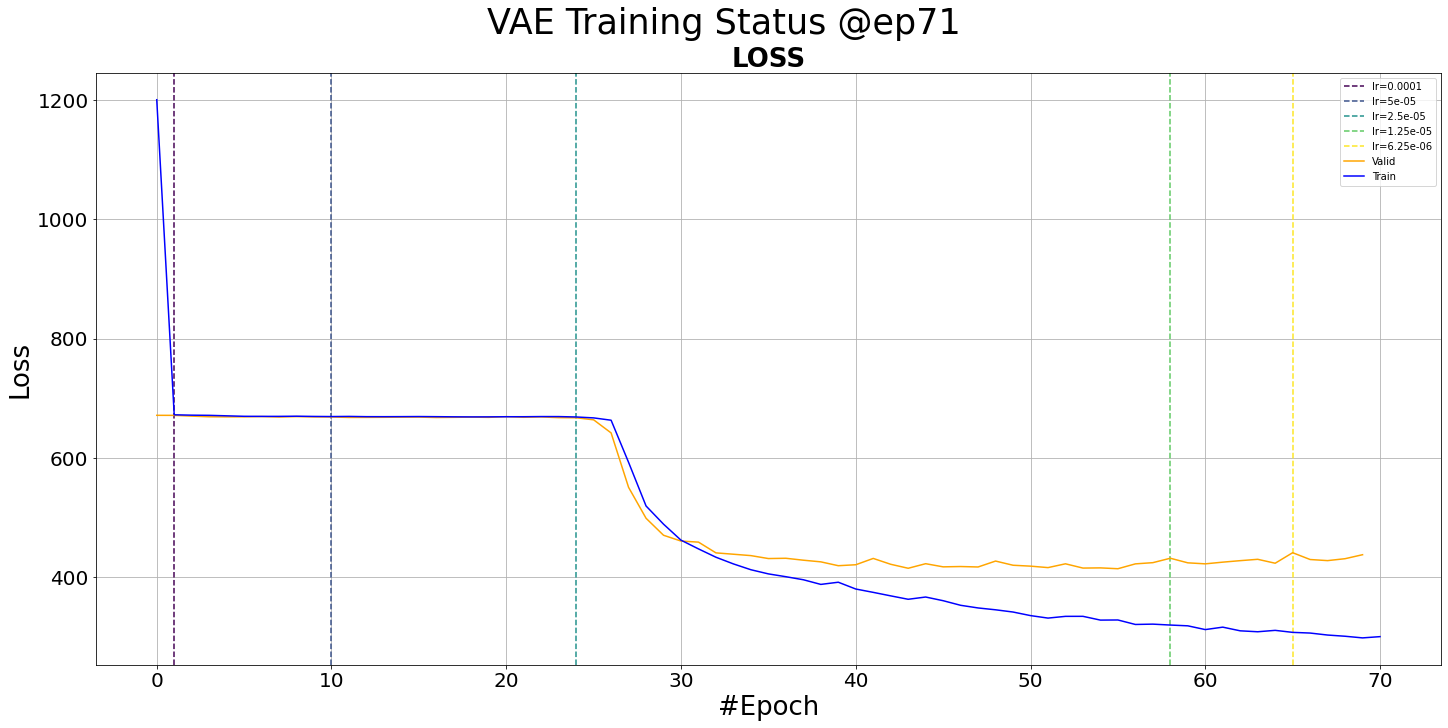

VAE test: sample=65/68, loss=153.8912    
Test finished. Average loss={'LOSS': 197.44654093244498}

Total training time: 12.433130741119385 sec


<Figure size 1440x720 with 0 Axes>

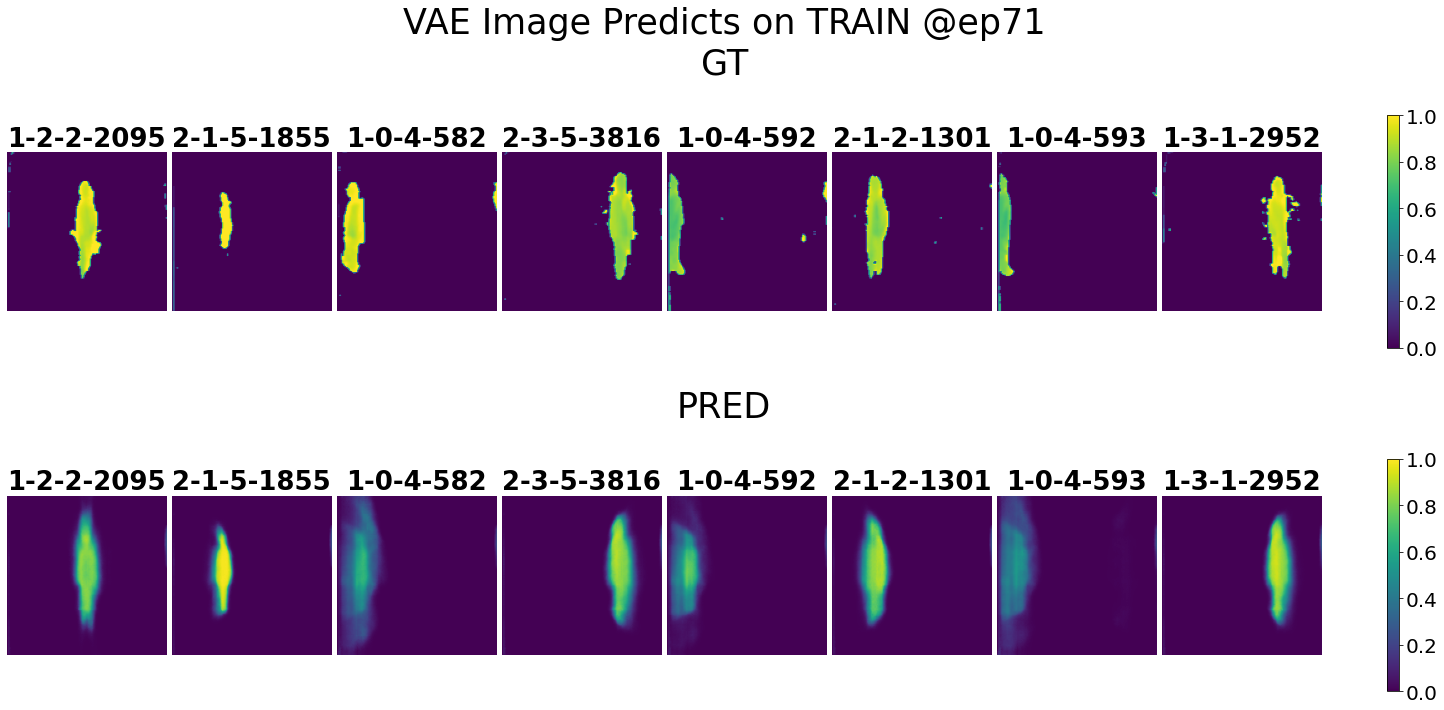

<Figure size 1440x720 with 0 Axes>

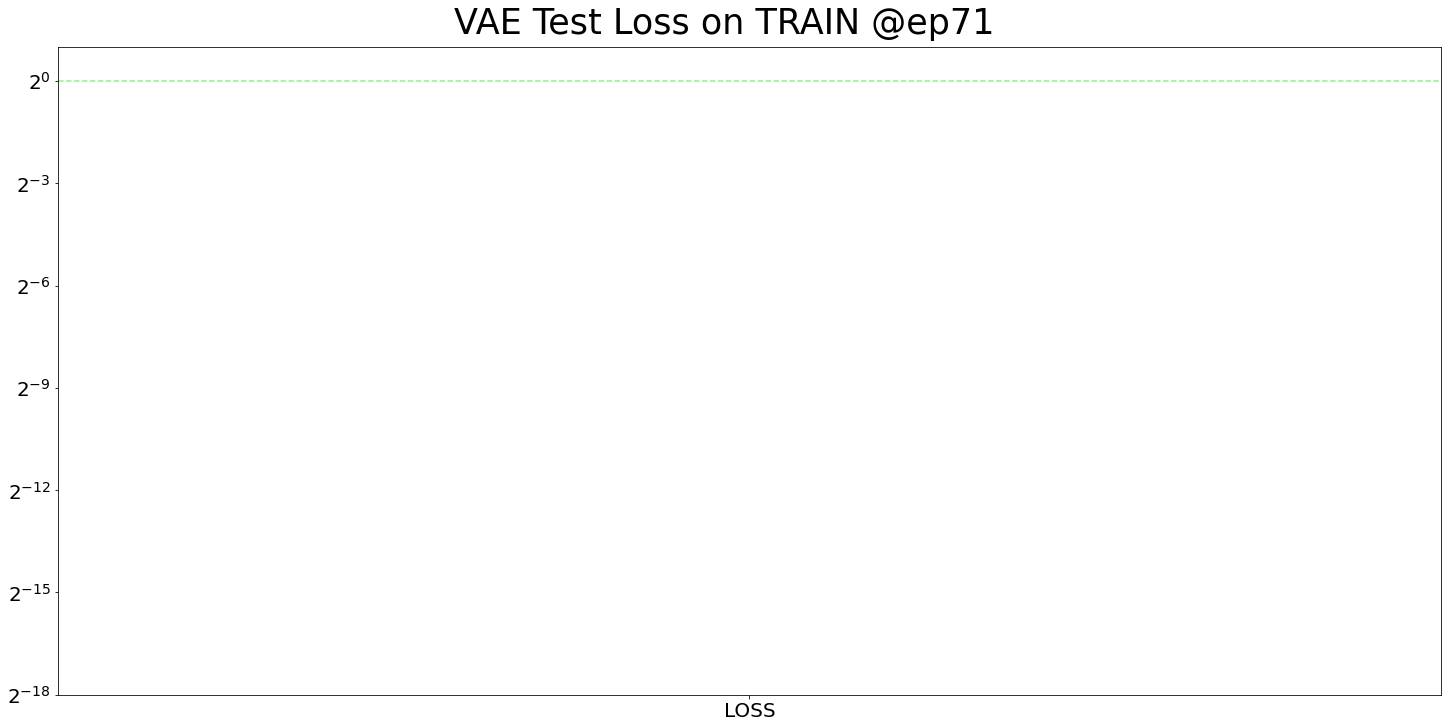

<Figure size 1440x720 with 0 Axes>

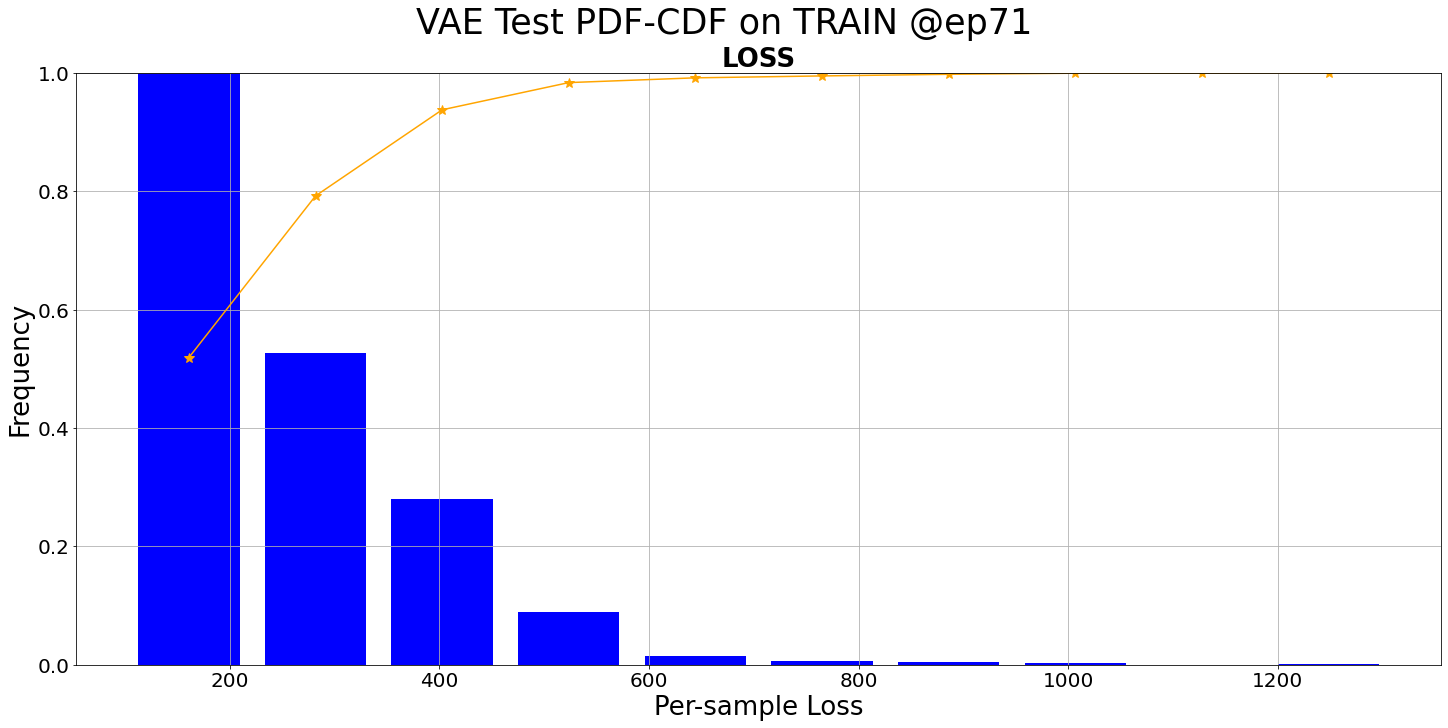

<Figure size 1440x720 with 0 Axes>

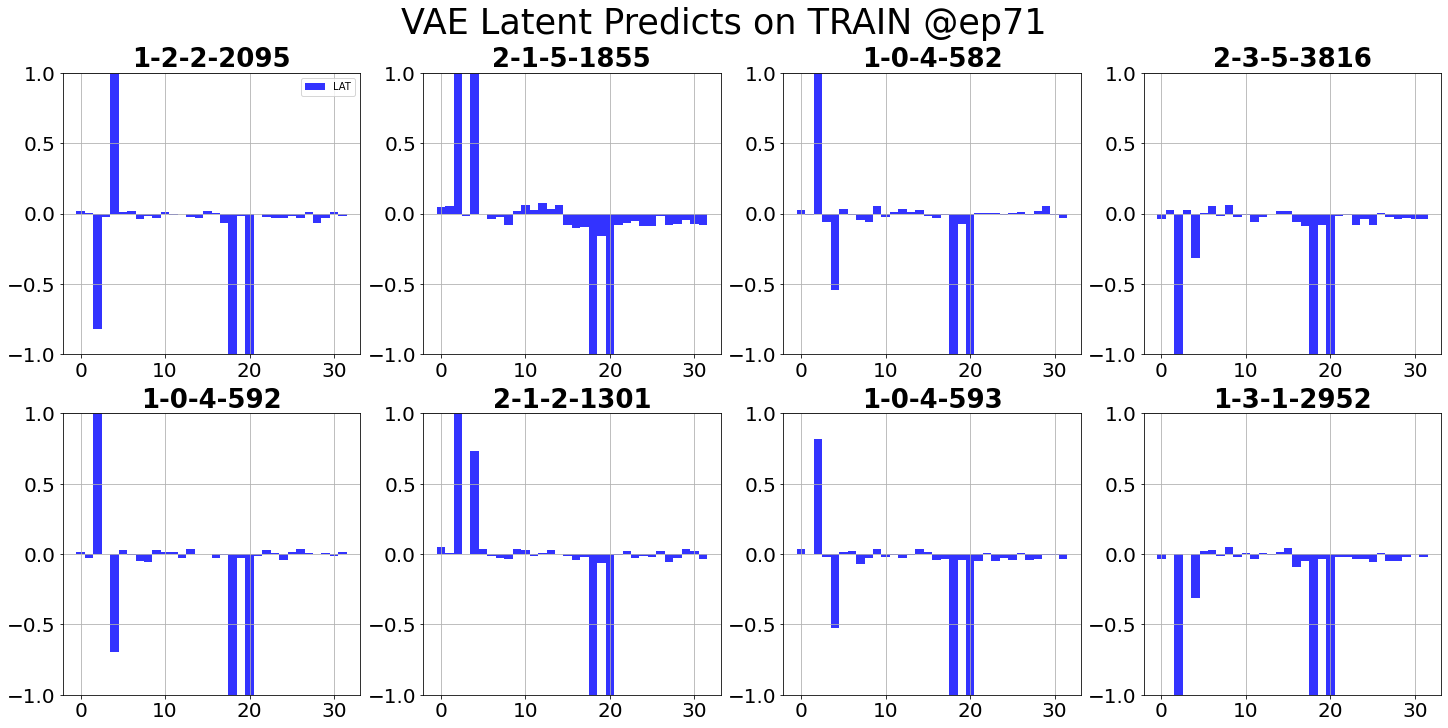

VAE test: sample=5065/5069, loss=409.2613     
Test finished. Average loss={'LOSS': 620.8031161502636}

Total training time: 26.692833423614502 sec


<Figure size 1440x720 with 0 Axes>

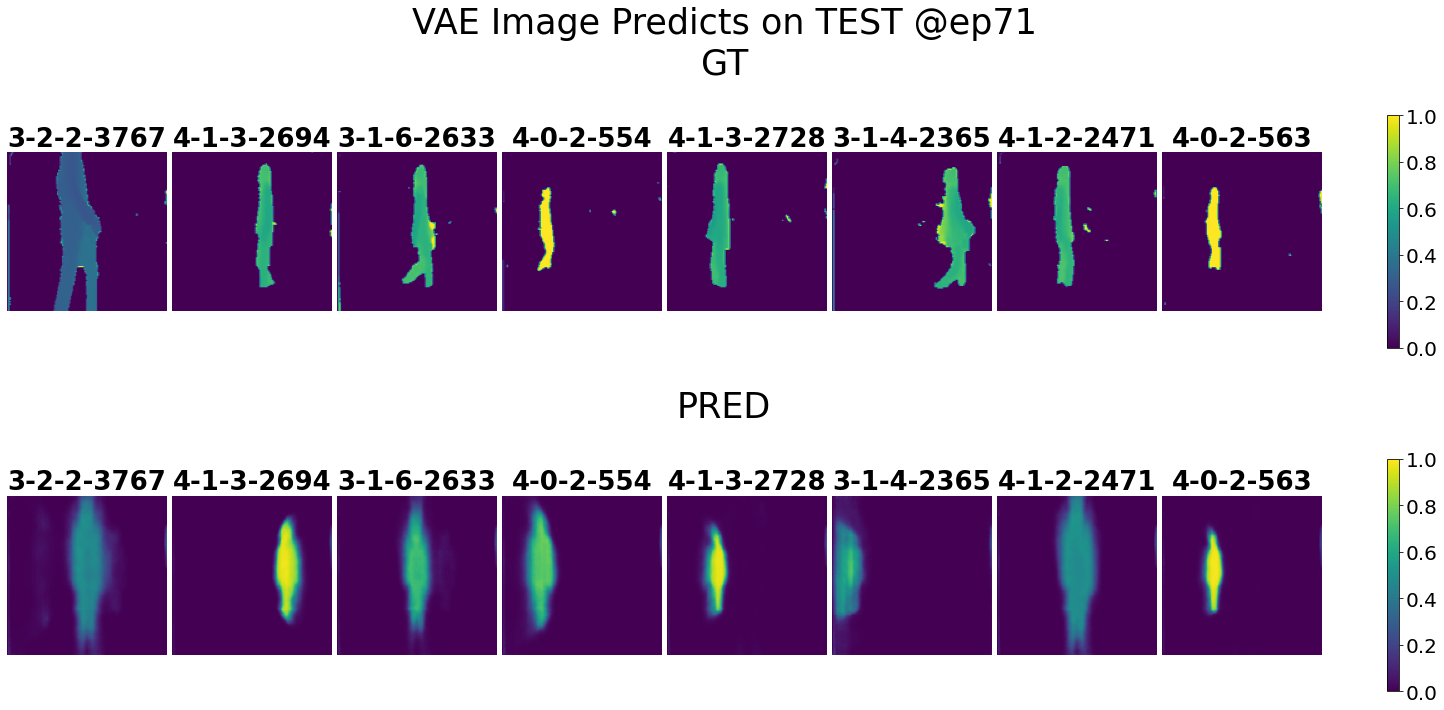

<Figure size 1440x720 with 0 Axes>

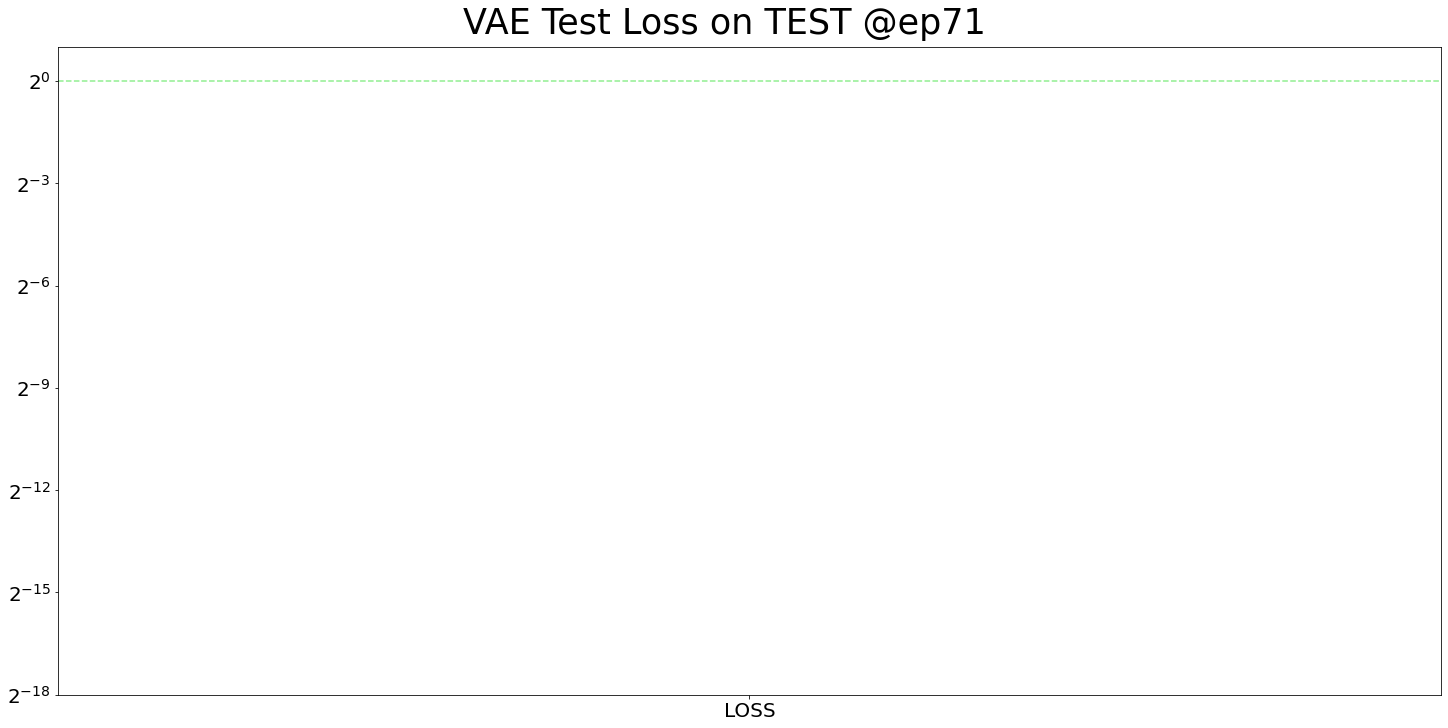

<Figure size 1440x720 with 0 Axes>

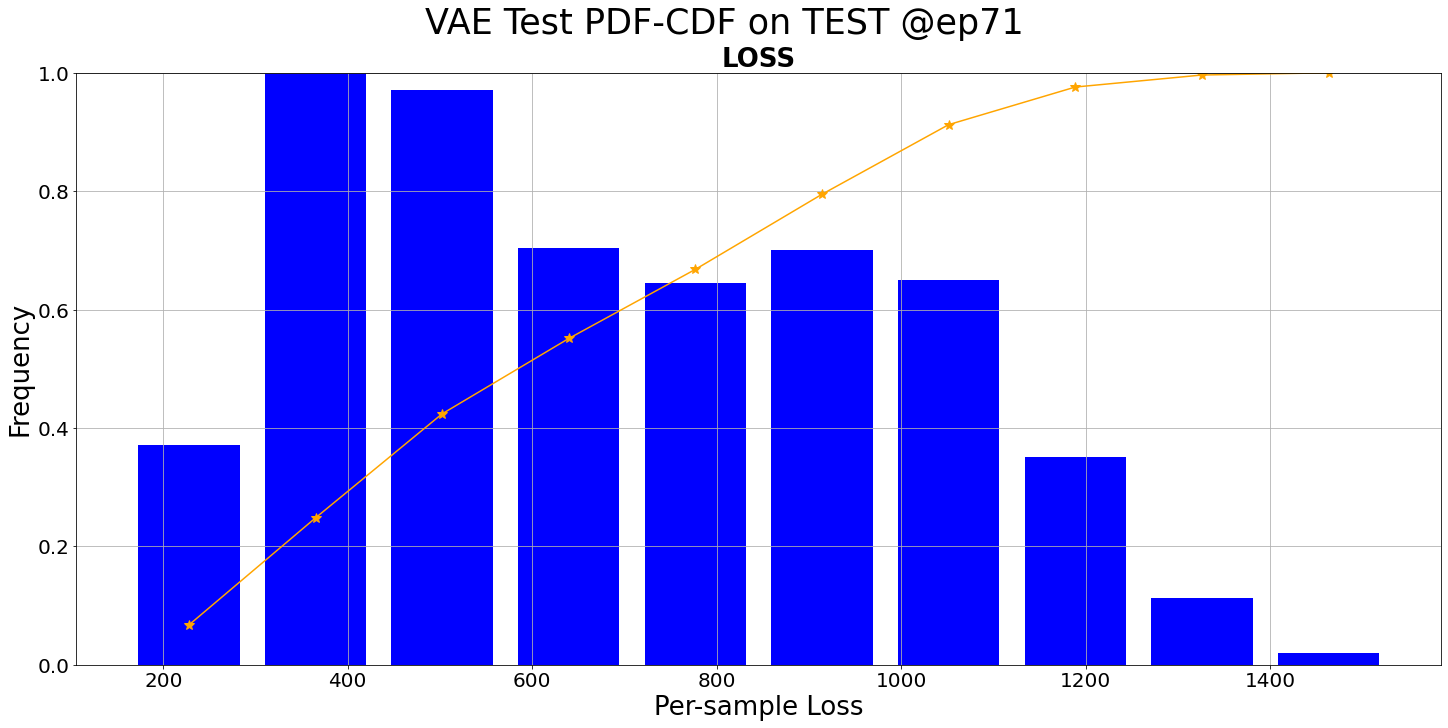

<Figure size 1440x720 with 0 Axes>

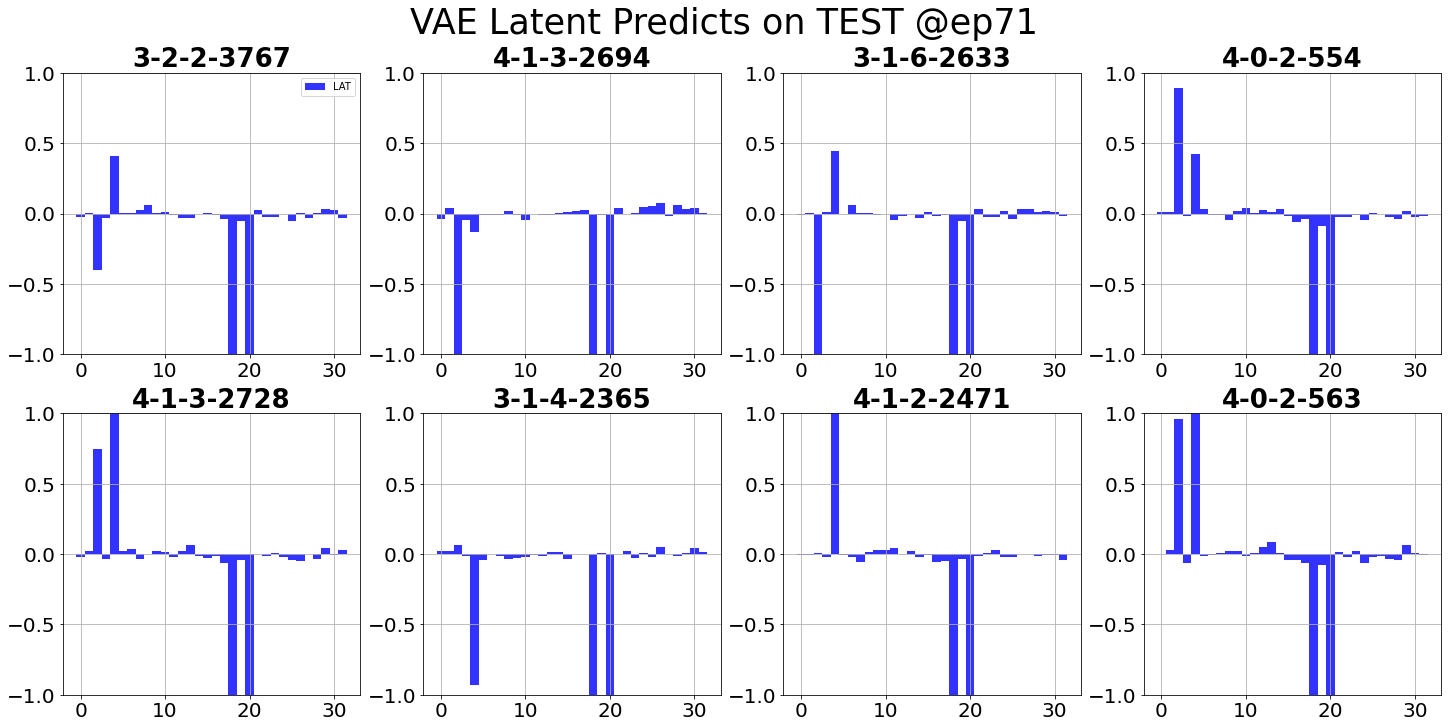

Saving pred including GT, PRED, LAT, TAG...Done

VAE schedule Completed!


In [8]:
# Training and Testing
%matplotlib inline
VAE_trainer.lr = 1e-4
vae_trained = VAE_trainer.schedule(early_stop=True, lr_decay=True)

In [8]:
print(VAE_trainer.loss.current_epoch)

52


### Teacher-Student AE

#### Teacher

In [9]:
torch.cuda.set_device(gpu)
imgencoder = TP.ImageEncoder(latent_dim=16)
imgdecoder = TP.ImageDecoder(latent_dim=16)
TSAE_T_trainer = TP.CompTrainer(name='Teacher', mode='ae_t', mask=False,
                              networks=[imgencoder, imgdecoder],
                 lr=1e-4, epochs=10, cuda=gpu,
                 train_loader=train_loader, valid_loader=valid_loader, test_loader=test_loader, notion=f'{date}_TSAE')

Teacher train: epoch=1/999, batch=0/68, loss=230858.5156, current best valid loss=inf    
Teacher train: epoch=1/999, batch=5/68, loss=226095.0469, current best valid loss=inf    
Teacher train: epoch=1/999, batch=10/68, loss=198101.2812, current best valid loss=inf    
Teacher train: epoch=1/999, batch=15/68, loss=54033.1562, current best valid loss=inf    
Teacher train: epoch=1/999, batch=20/68, loss=44928.6367, current best valid loss=inf    
Teacher train: epoch=1/999, batch=25/68, loss=43410.3242, current best valid loss=inf    
Teacher train: epoch=1/999, batch=30/68, loss=44594.5625, current best valid loss=inf    
Teacher train: epoch=1/999, batch=35/68, loss=42826.5078, current best valid loss=inf    
Teacher train: epoch=1/999, batch=40/68, loss=42871.7812, current best valid loss=inf    
Teacher train: epoch=1/999, batch=45/68, loss=43129.7656, current best valid loss=inf    
Teacher train: epoch=1/999, batch=50/68, loss=42665.1133, current best valid loss=inf    
Teacher t

<Figure size 432x288 with 0 Axes>

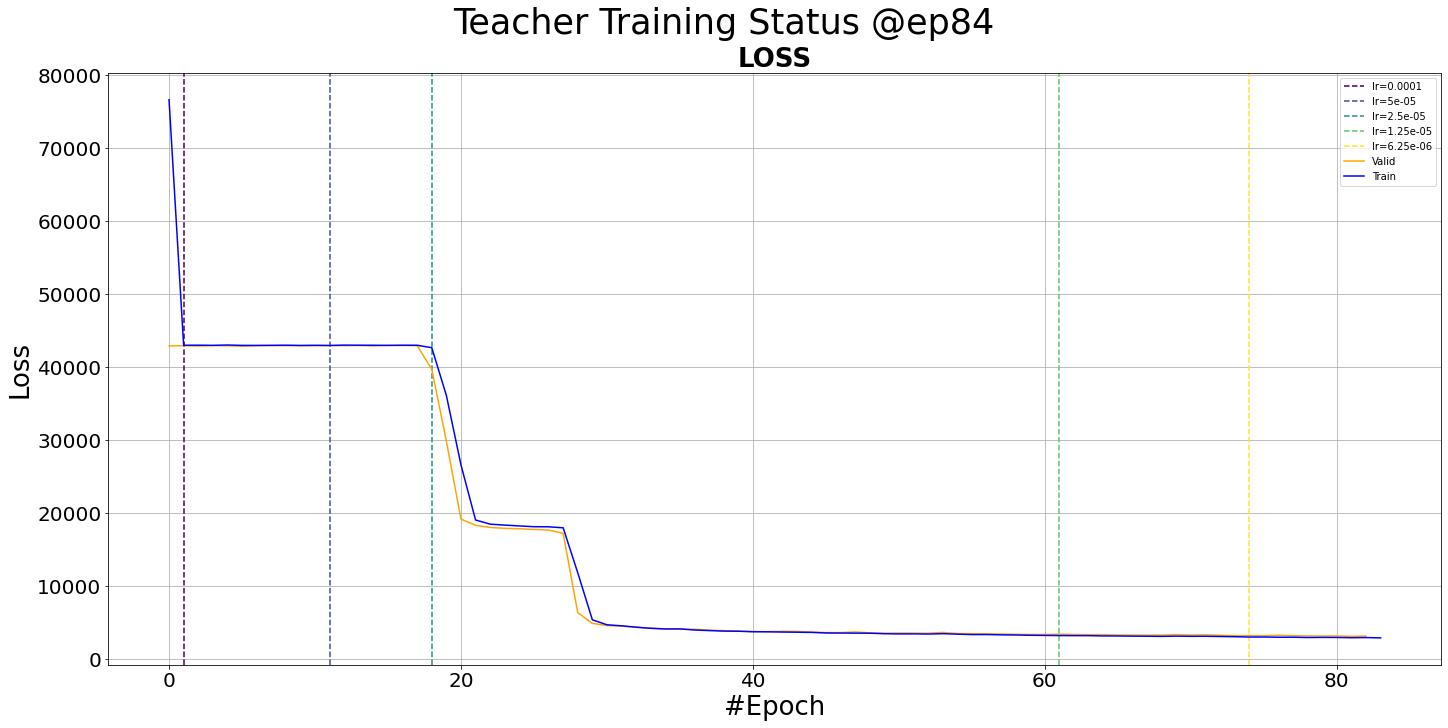

Teacher test: sample=65/68, loss=37.8219    
Test finished. Average loss={'LOSS': 44.41291058238815}

Total training time: 14.427198648452759 sec


<Figure size 1440x720 with 0 Axes>

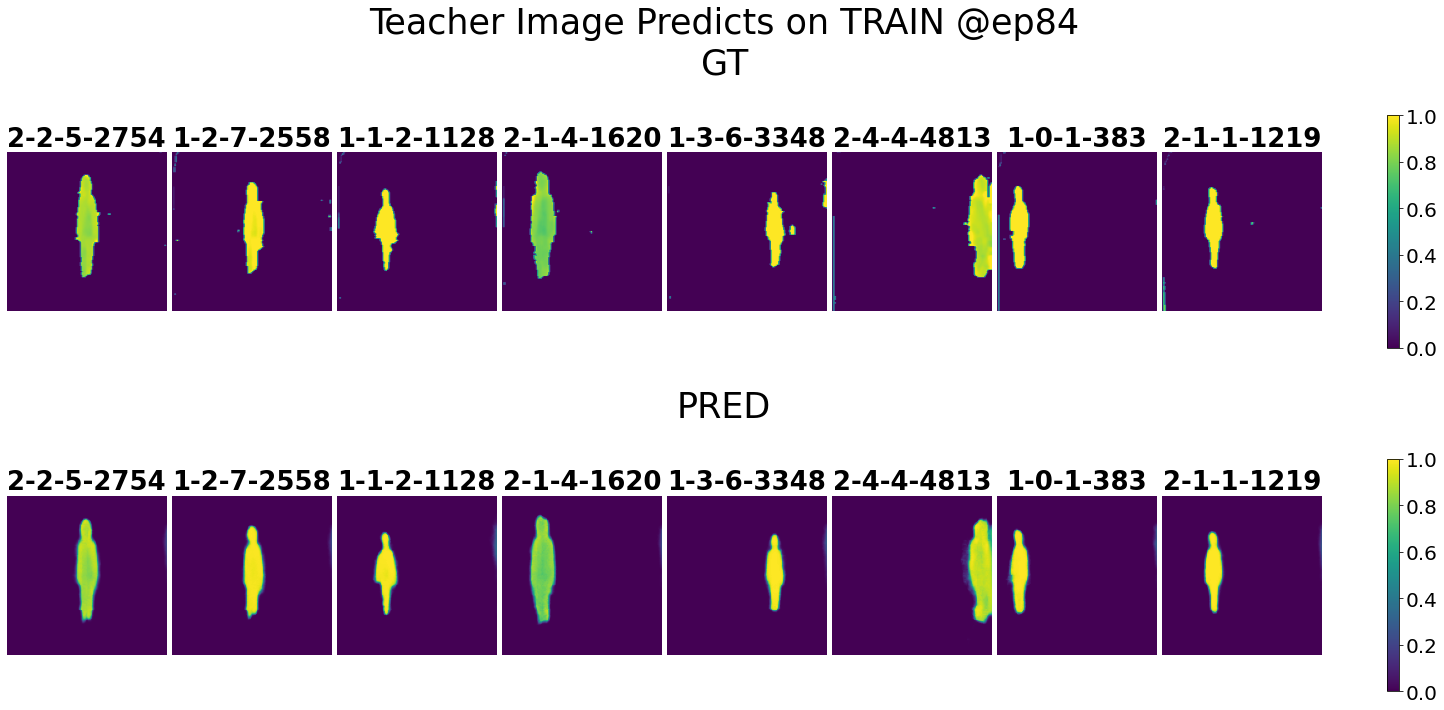

<Figure size 1440x720 with 0 Axes>

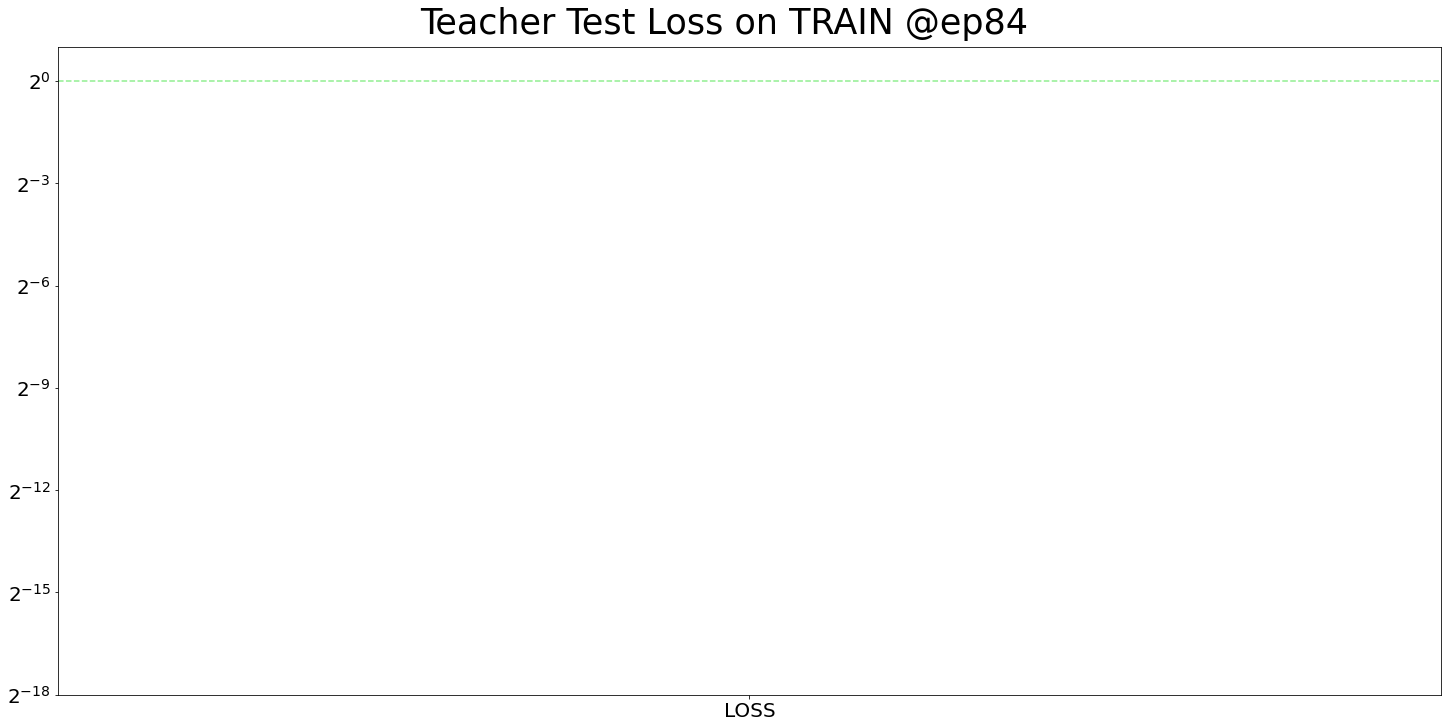

<Figure size 1440x720 with 0 Axes>

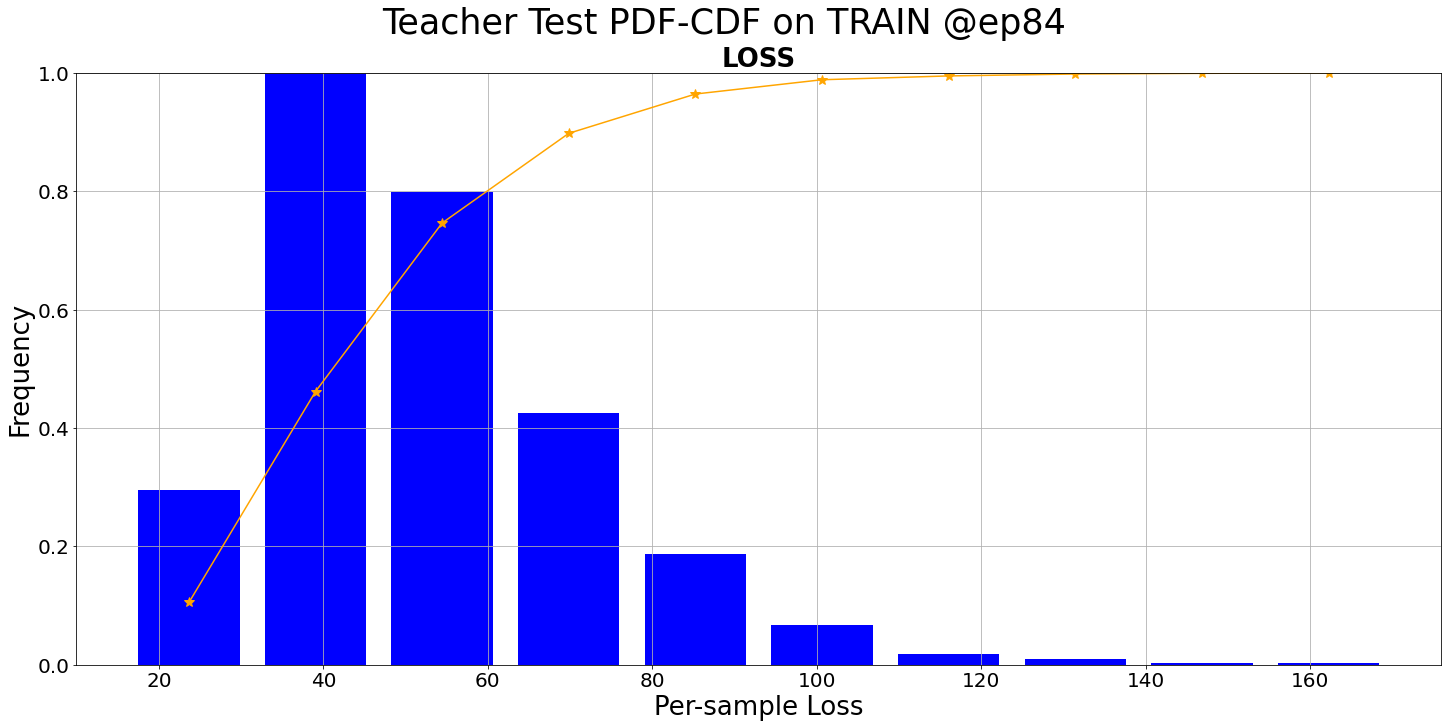

<Figure size 1440x720 with 0 Axes>

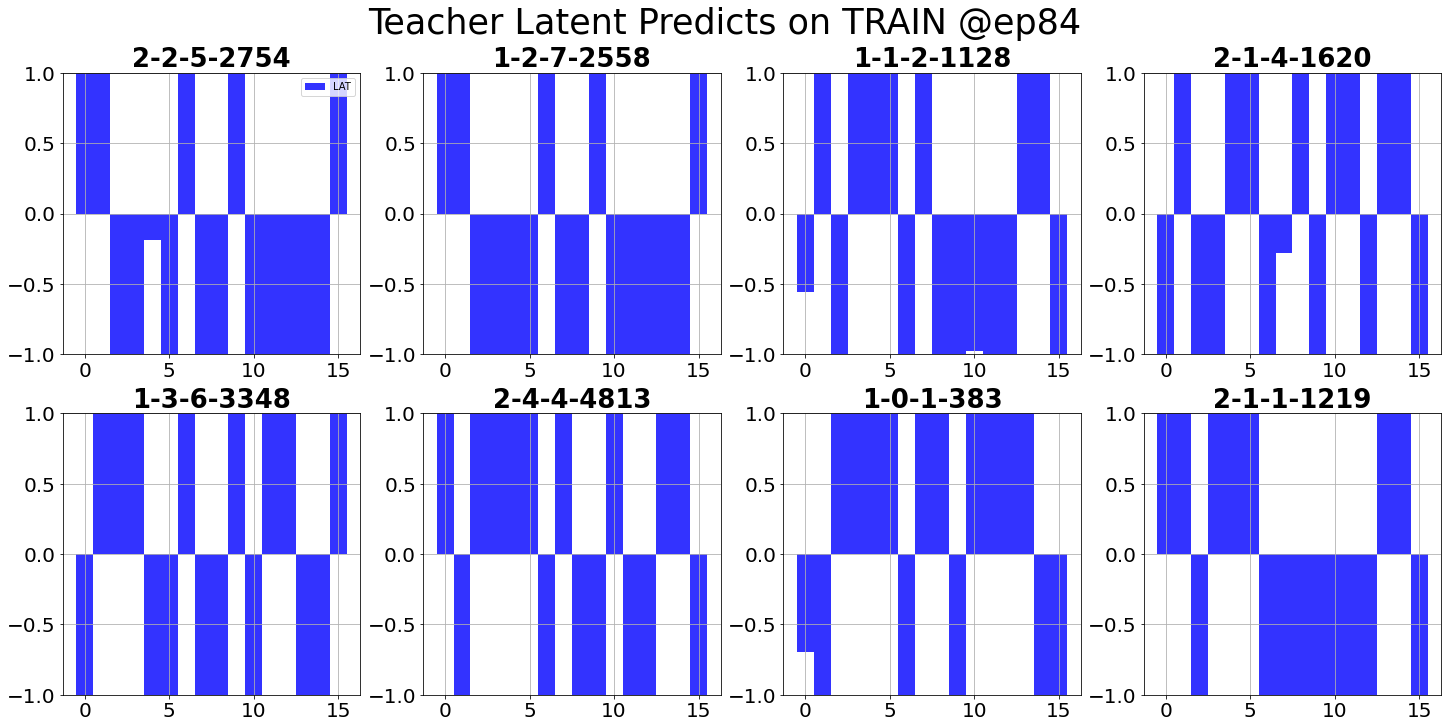

Teacher test: sample=5065/5069, loss=207.3449     
Test finished. Average loss={'LOSS': 319.76964568640267}

Total training time: 29.008156538009644 sec


<Figure size 1440x720 with 0 Axes>

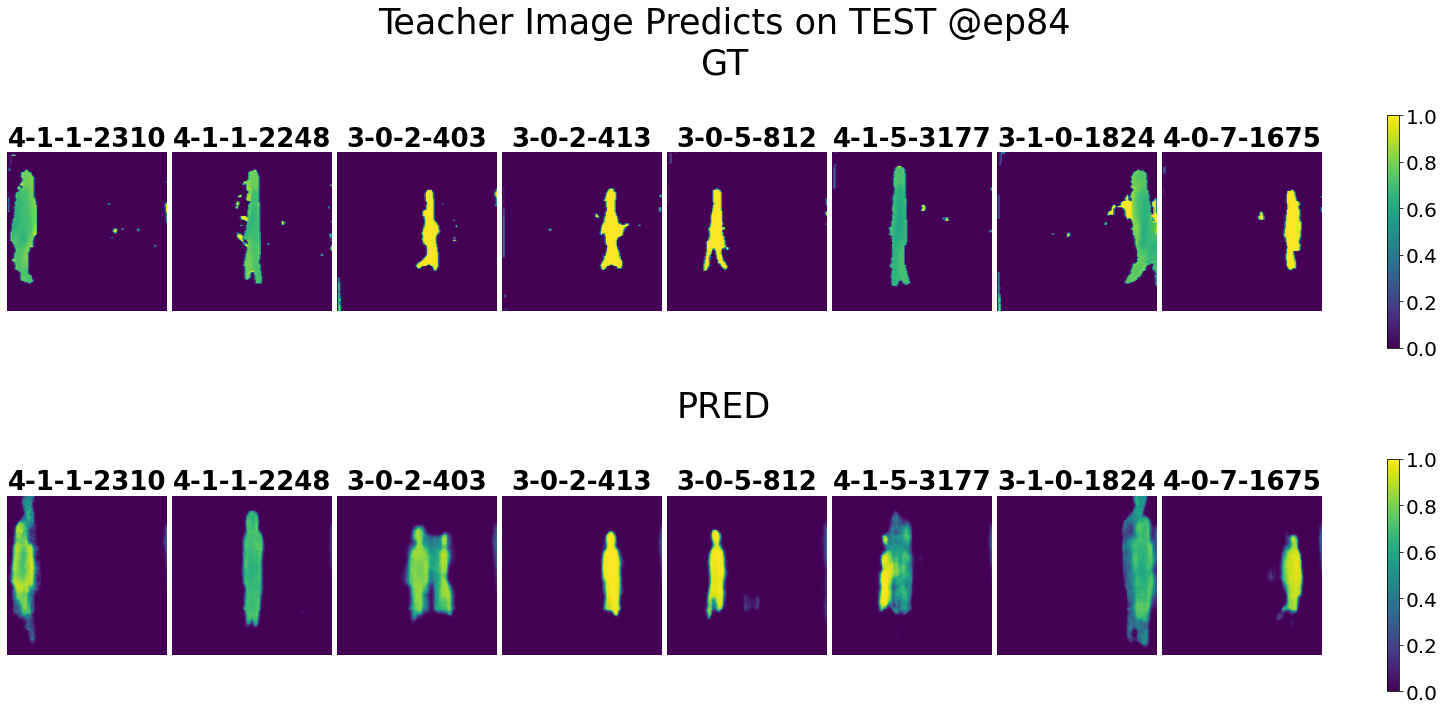

<Figure size 1440x720 with 0 Axes>

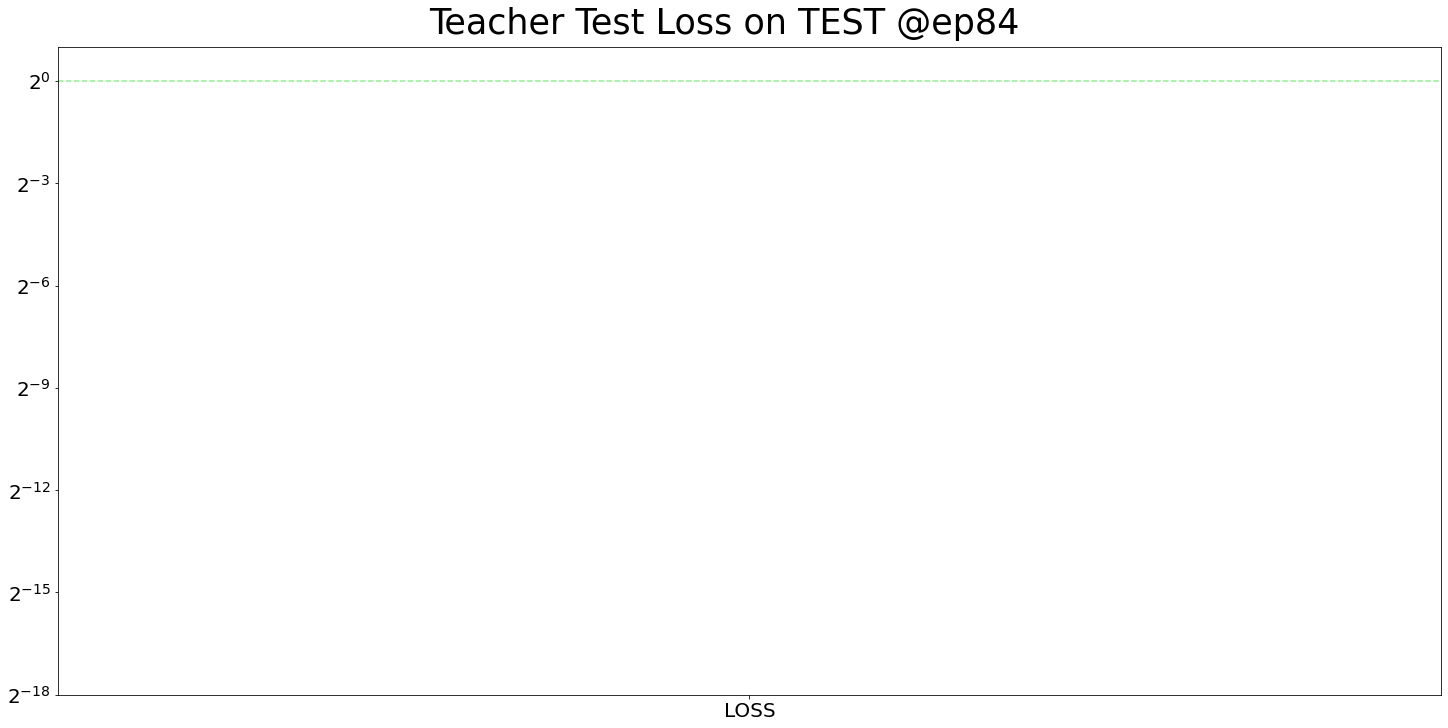

<Figure size 1440x720 with 0 Axes>

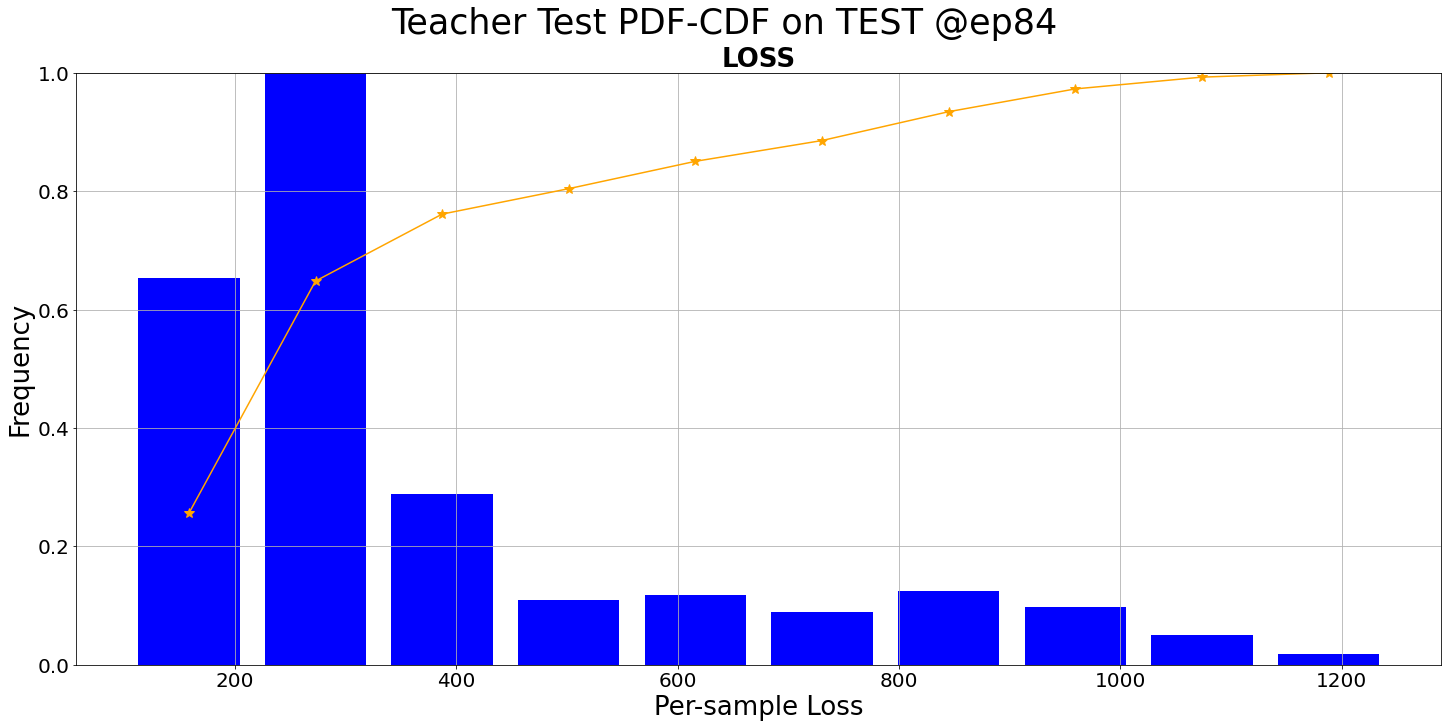

<Figure size 1440x720 with 0 Axes>

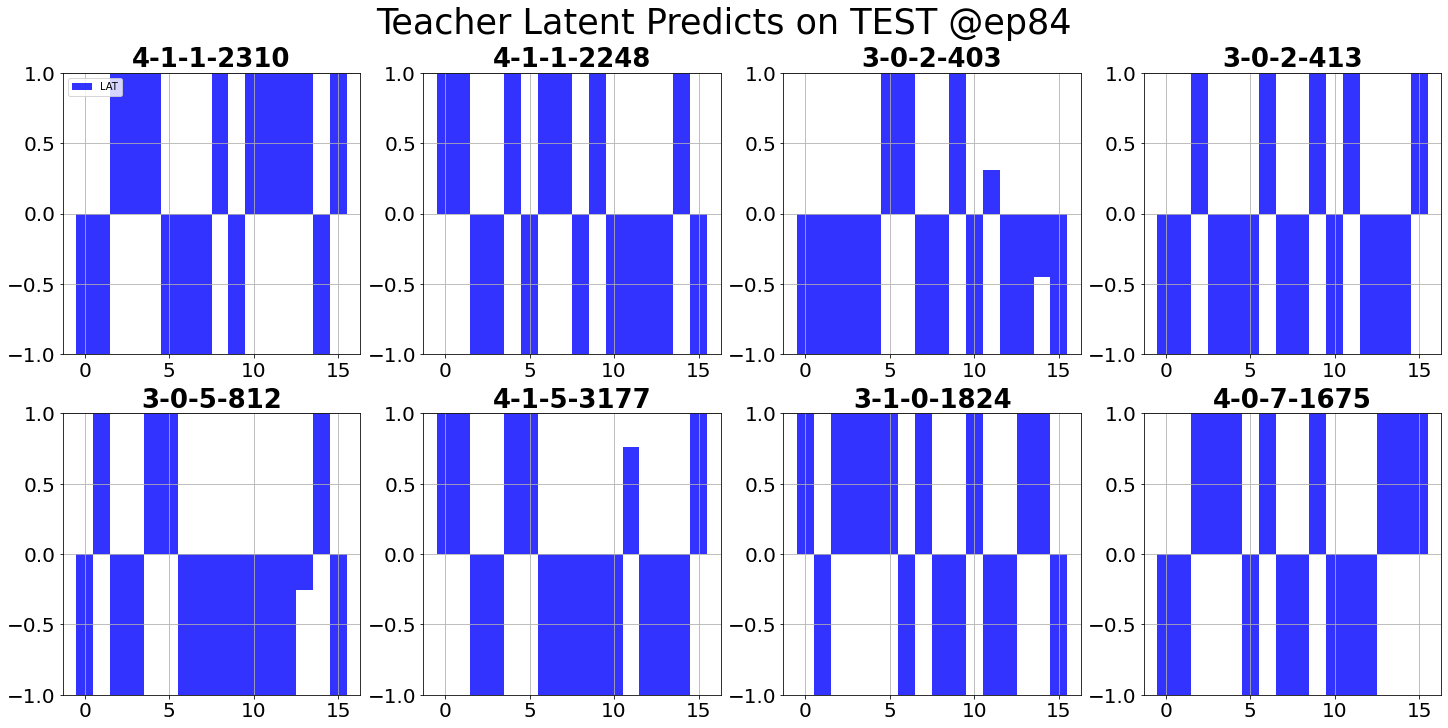

Saving pred including GT, PRED, LAT, TAG...Done

Teacher schedule Completed!


In [10]:
# Training and Testing
%matplotlib inline
tsae_t_trained = TSAE_T_trainer.schedule()

#### Student

In [11]:
csiencoder = TP.CSIEncoder(out_length=16)
imgencoder = tsae_t_trained['imgen']
imgdecoder = tsae_t_trained['imgde']

TSAE_S_trainer = TP.CompTrainerAEStudent(
                              name='Student', mask=False,
    networks=[csiencoder, imgencoder, imgdecoder],
                 lr=1e-4, epochs=10, cuda=gpu,
                 train_loader=train_loader, valid_loader=valid_loader, test_loader=test_loader, notion=f'{date}TSAE')

Student train: epoch=1/999, batch=0/68, loss=468.4950, current best valid loss=inf    
Student train: epoch=1/999, batch=5/68, loss=563.3684, current best valid loss=inf    
Student train: epoch=1/999, batch=10/68, loss=393.6928, current best valid loss=inf    
Student train: epoch=1/999, batch=15/68, loss=440.0371, current best valid loss=inf    
Student train: epoch=1/999, batch=20/68, loss=460.4525, current best valid loss=inf    
Student train: epoch=1/999, batch=25/68, loss=404.0228, current best valid loss=inf    
Student train: epoch=1/999, batch=30/68, loss=533.2633, current best valid loss=inf    
Student train: epoch=1/999, batch=35/68, loss=486.2372, current best valid loss=inf    
Student train: epoch=1/999, batch=40/68, loss=453.0307, current best valid loss=inf    
Student train: epoch=1/999, batch=45/68, loss=434.7810, current best valid loss=inf    
Student train: epoch=1/999, batch=50/68, loss=322.2672, current best valid loss=inf    
Student train: epoch=1/999, batch=

<Figure size 432x288 with 0 Axes>

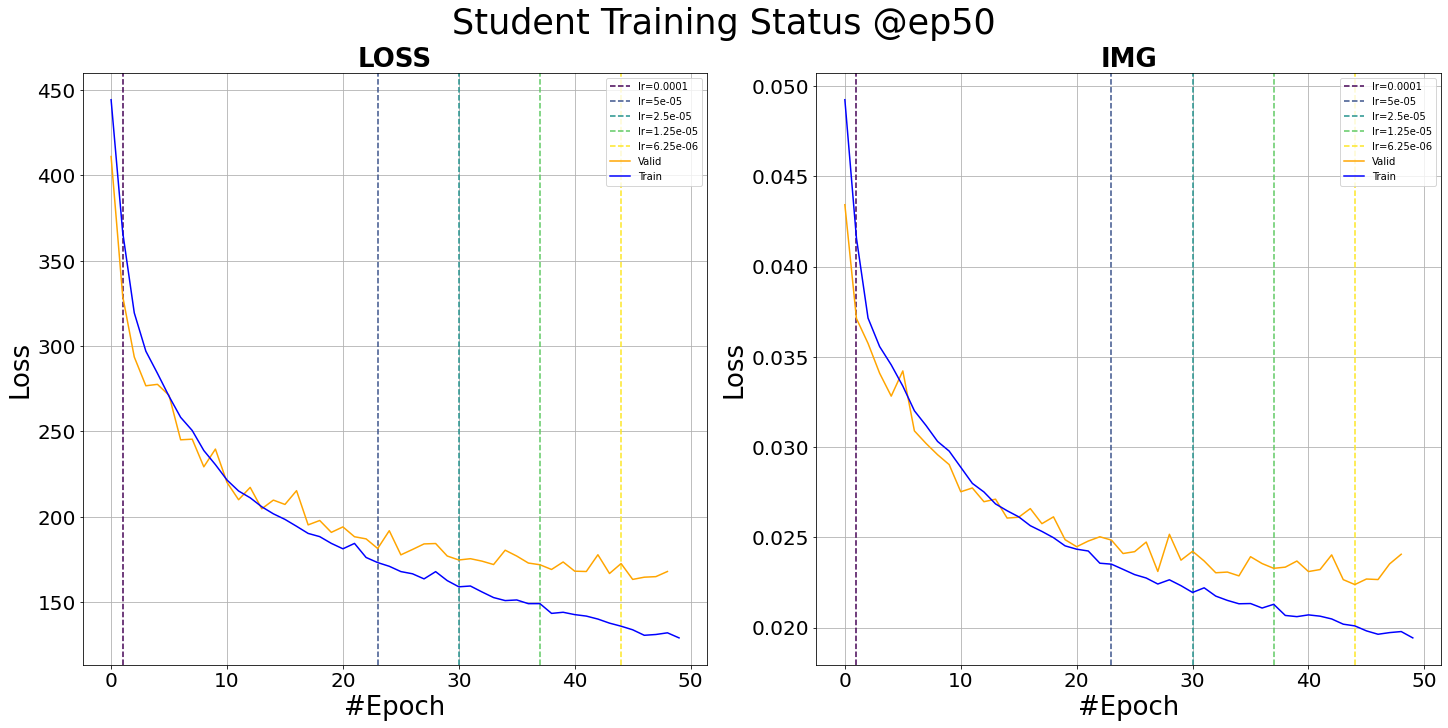

Student test: sample=65/68, loss=197.0638    
Test finished. Average loss={'LOSS': 127.00787675657364, 'IMG': 0.01986045365985025}

Total training time: 22.762162685394287 sec


<Figure size 1440x720 with 0 Axes>

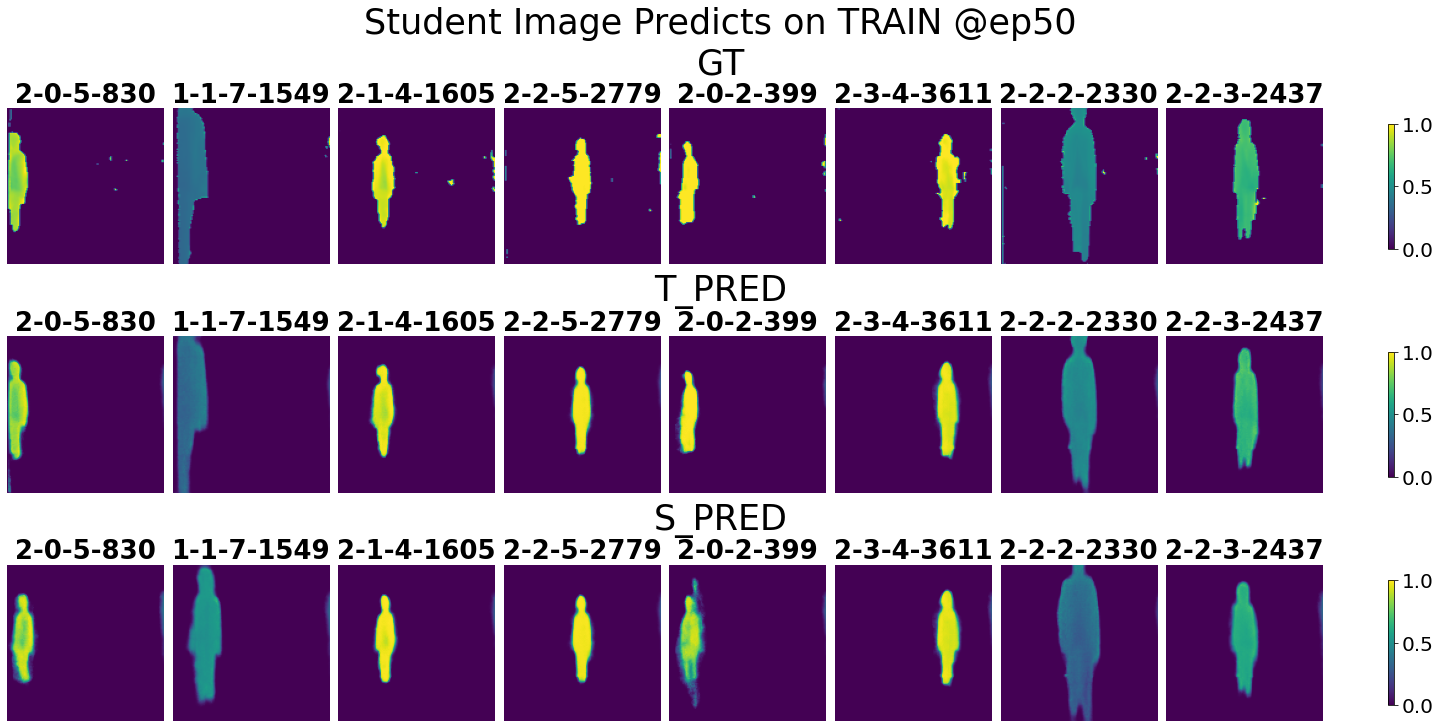

<Figure size 1440x720 with 0 Axes>

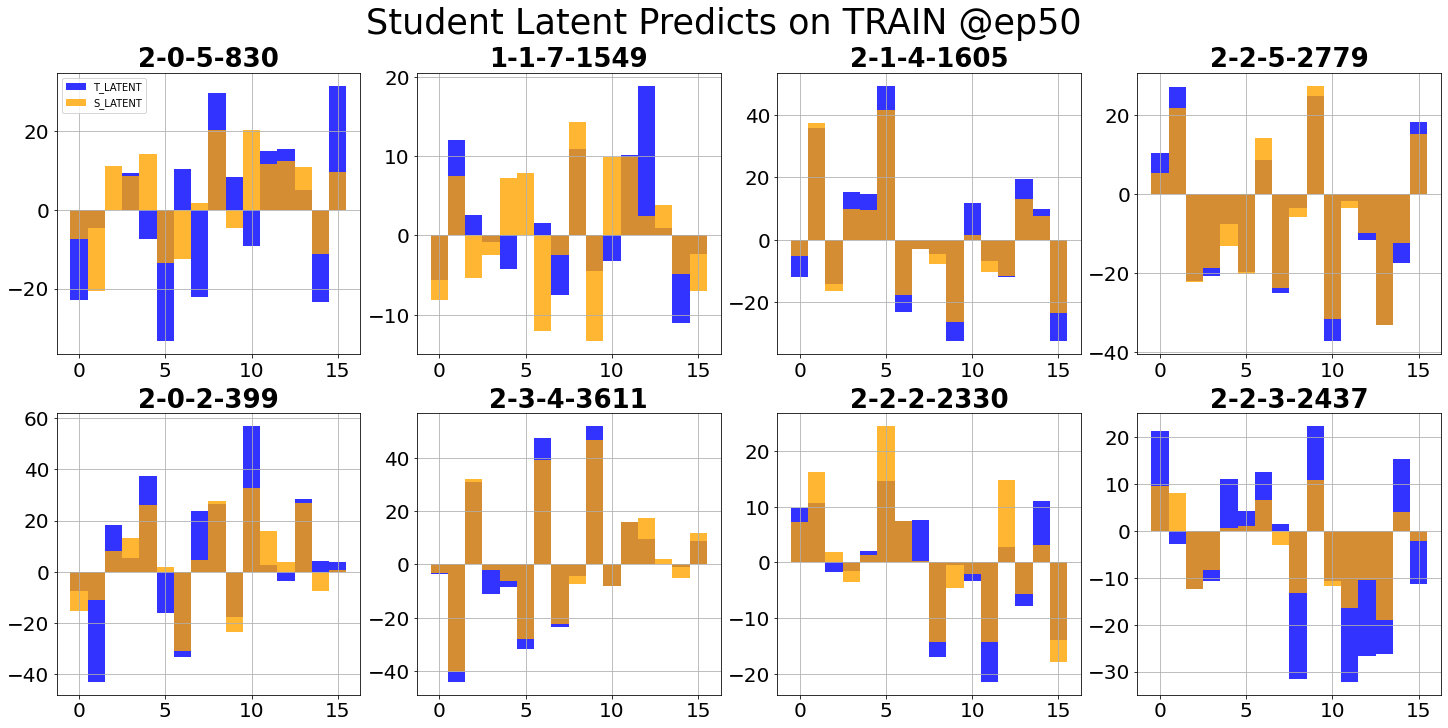

<Figure size 1440x720 with 0 Axes>

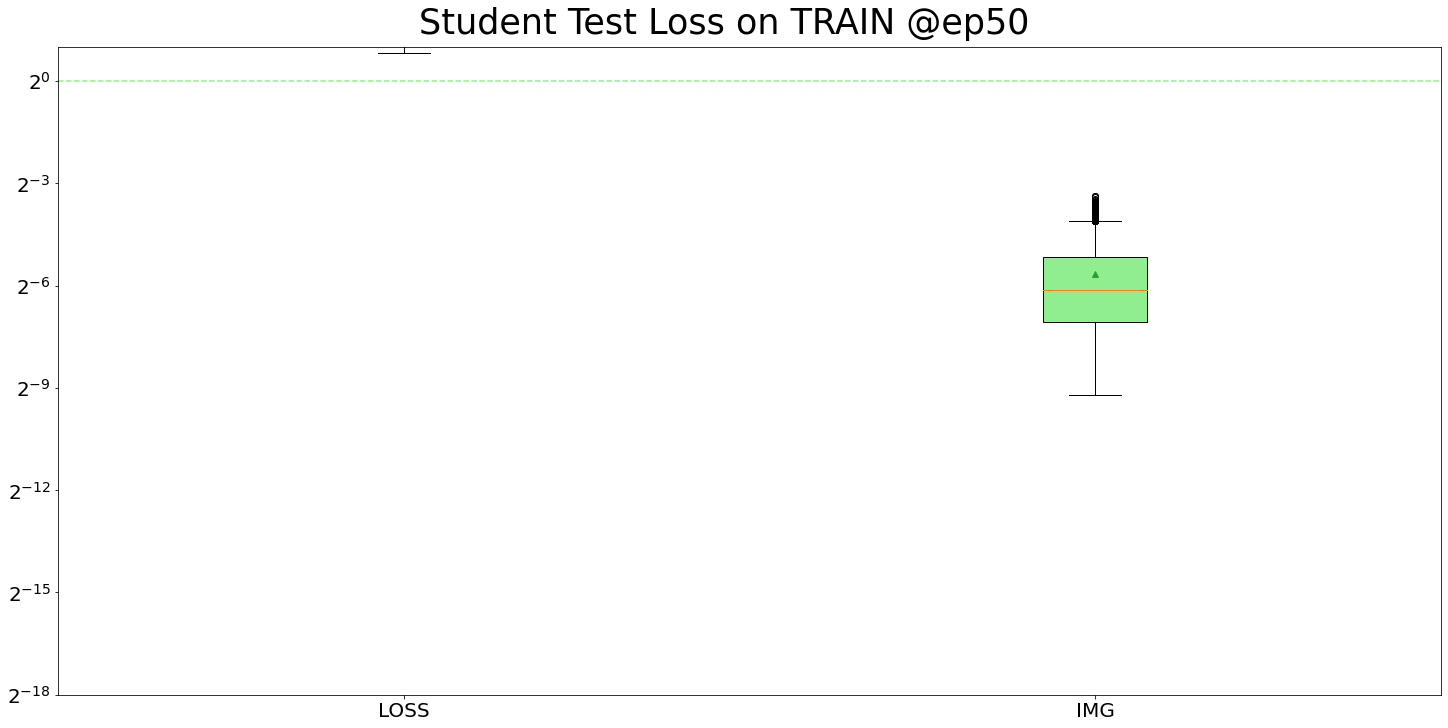

<Figure size 1440x720 with 0 Axes>

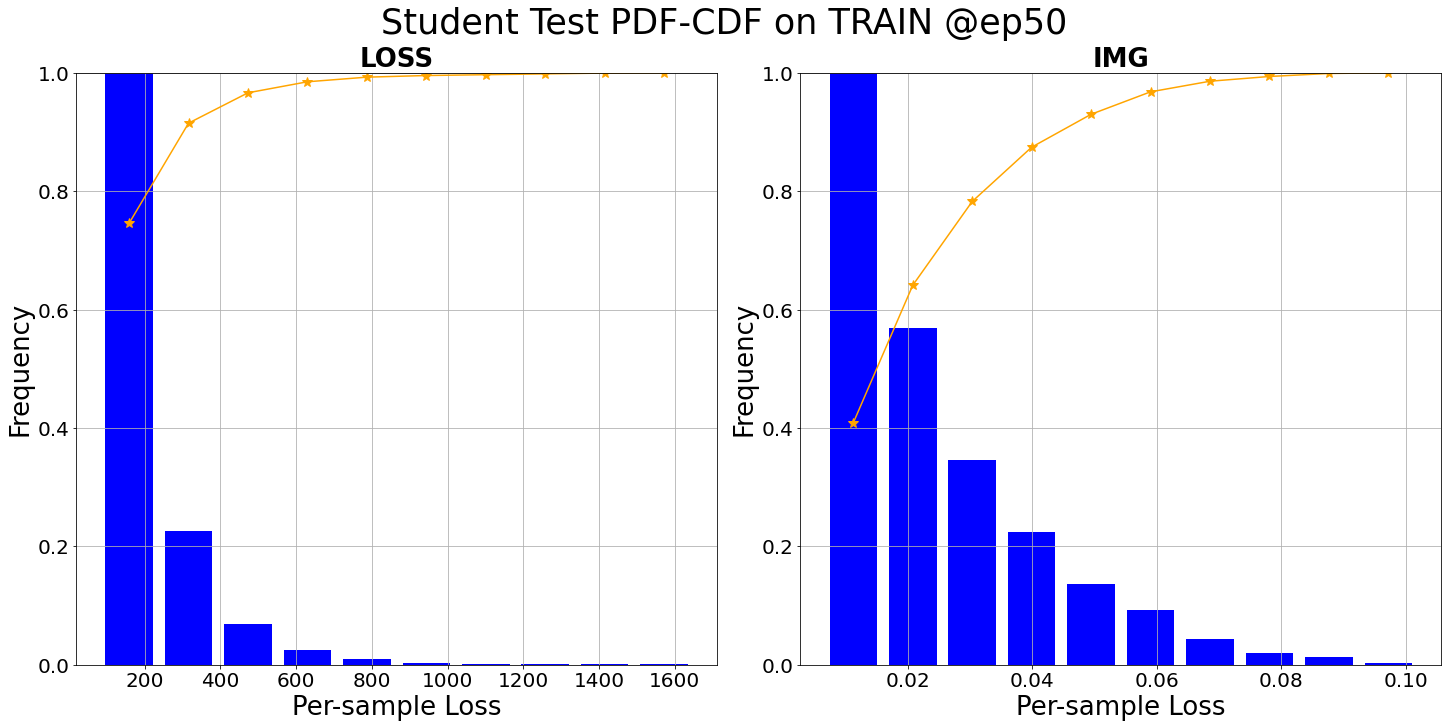

Student test: sample=5065/5069, loss=448.4026     
Test finished. Average loss={'LOSS': 309.3769914603934, 'IMG': 0.04328511118451396}

Total training time: 39.384079933166504 sec


<Figure size 1440x720 with 0 Axes>

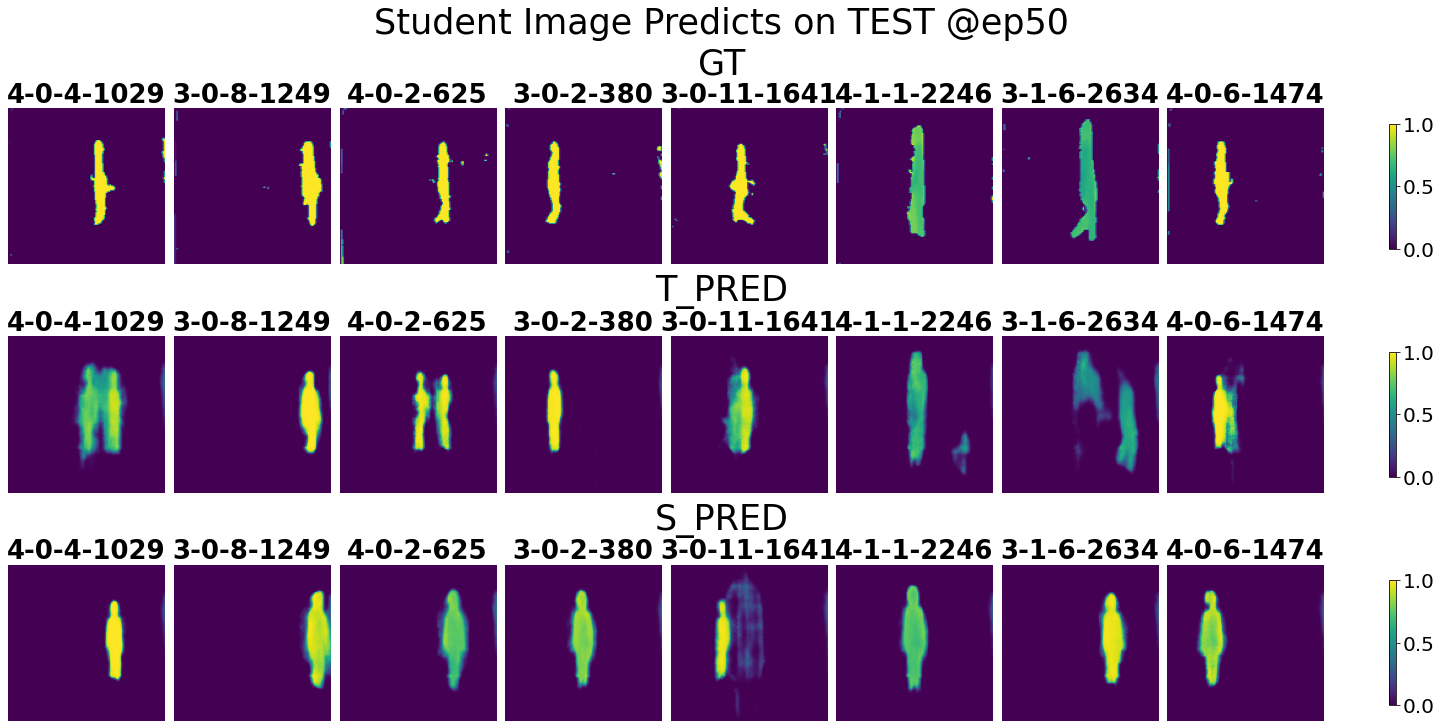

<Figure size 1440x720 with 0 Axes>

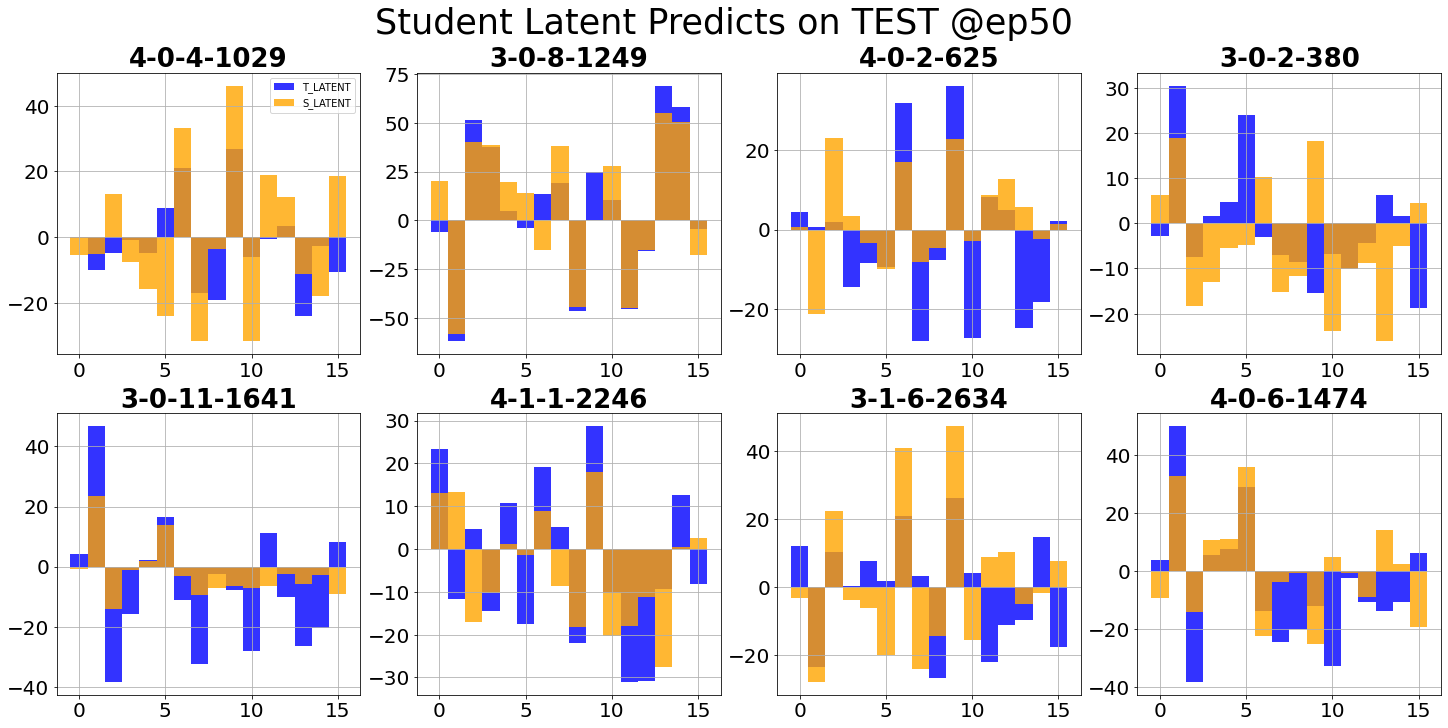

<Figure size 1440x720 with 0 Axes>

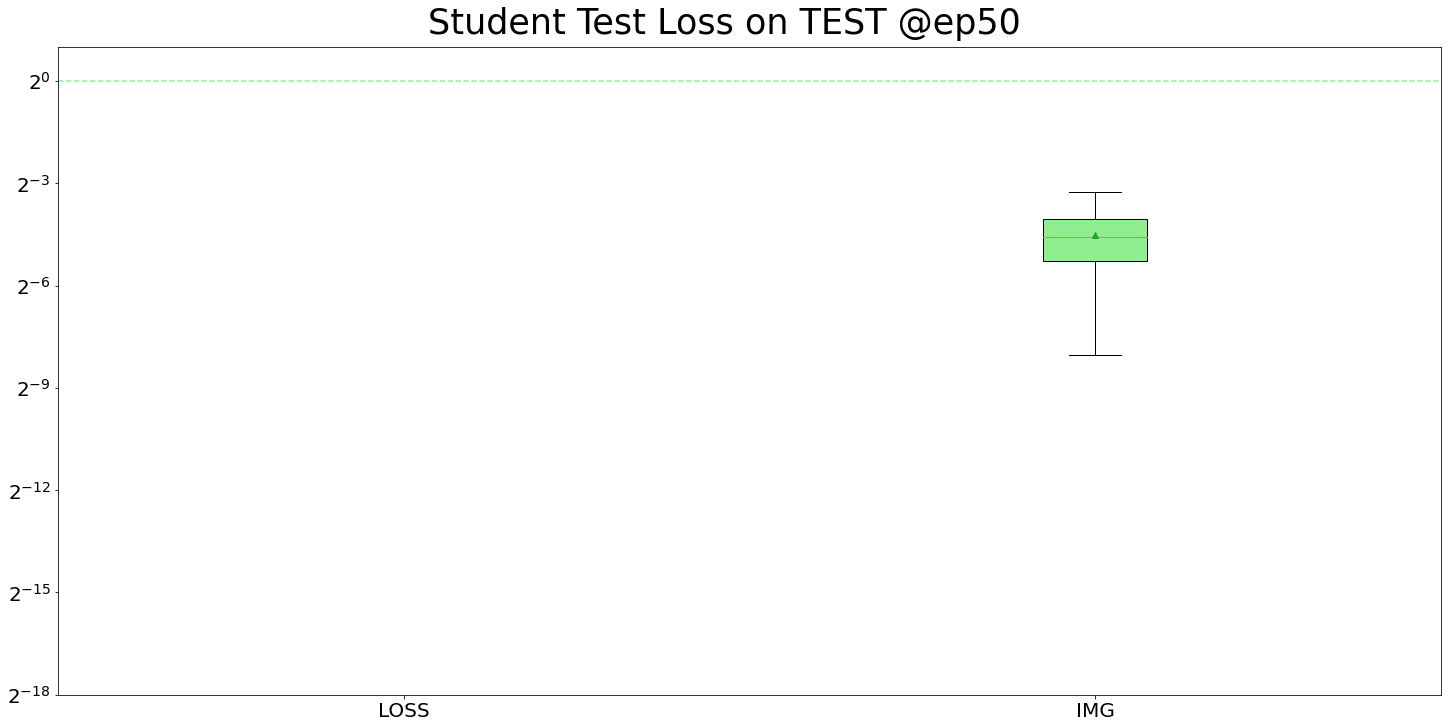

<Figure size 1440x720 with 0 Axes>

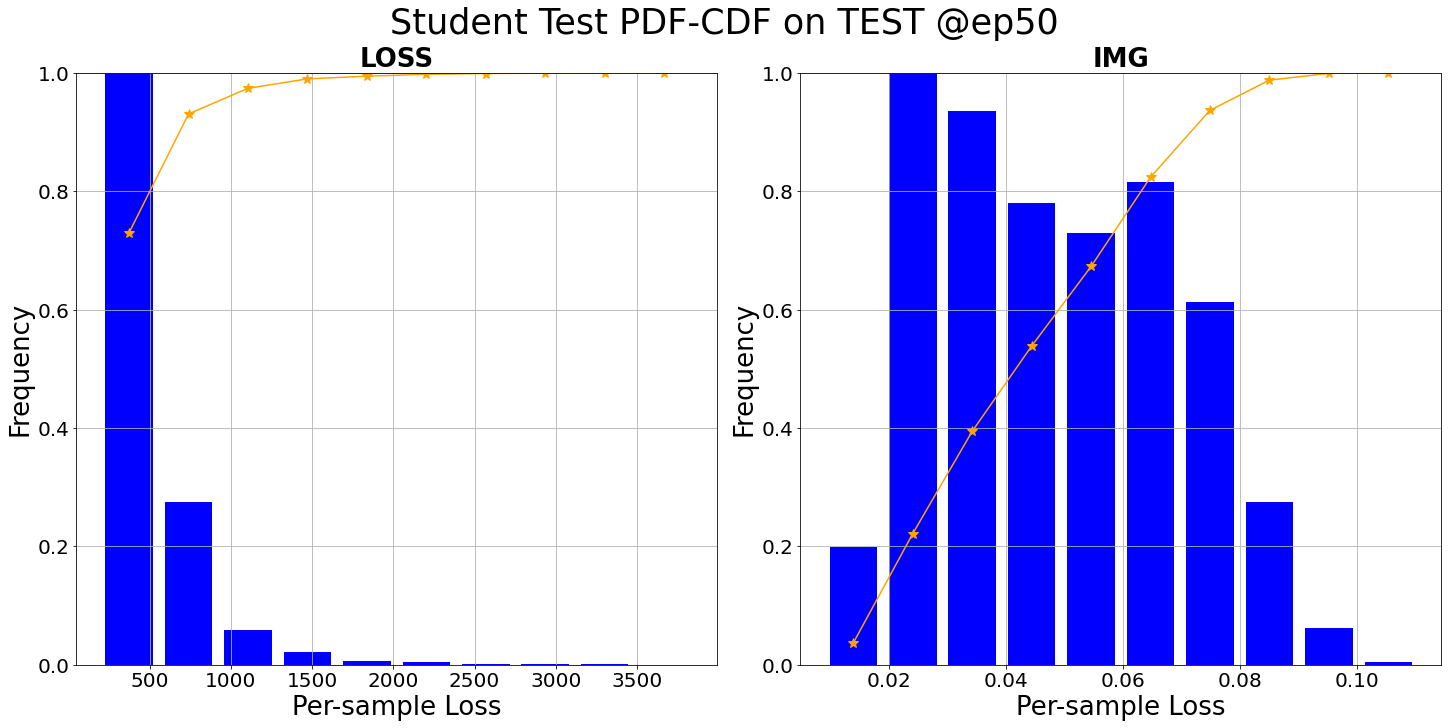

Saving pred including GT, T_PRED, S_PRED, T_LATENT, S_LATENT, TAG...Done

Student schedule Completed!


In [12]:
# Training and Testing
%matplotlib inline
tsae_s_trained = TSAE_S_trainer.schedule()

### Teacher-Student VAE

#### Teacher

In [20]:
import TrainerVTS_Comp as TP_TSVAE
torch.cuda.set_device(gpu)
imgencoder = TP_TSVAE.ImageEncoder(latent_dim=16)
imgdecoder = TP_TSVAE.ImageDecoder(latent_dim=16)
TSVAE_T_trainer = TP_TSVAE.TeacherTrainer(name='Teacher', mask=False,
                                         networks=[imgencoder, imgdecoder],
                                         lr=1e-4, epochs=10, cuda=gpu,
                                         train_loader=train_loader, valid_loader=valid_loader, test_loader=test_loader, notion=f'{date}TSVAE')

Teacher train: epoch=1/999, batch=0/68, loss=11391.4434, current best valid loss=inf    
Teacher train: epoch=1/999, batch=5/68, loss=11179.4824, current best valid loss=inf    
Teacher train: epoch=1/999, batch=10/68, loss=9656.0938, current best valid loss=inf    
Teacher train: epoch=1/999, batch=15/68, loss=5601.2871, current best valid loss=inf    
Teacher train: epoch=1/999, batch=20/68, loss=4684.5029, current best valid loss=inf    
Teacher train: epoch=1/999, batch=25/68, loss=4610.8857, current best valid loss=inf    
Teacher train: epoch=1/999, batch=30/68, loss=4233.6118, current best valid loss=inf    
Teacher train: epoch=1/999, batch=35/68, loss=3894.3784, current best valid loss=inf    
Teacher train: epoch=1/999, batch=40/68, loss=3949.2285, current best valid loss=inf    
Teacher train: epoch=1/999, batch=45/68, loss=3750.1929, current best valid loss=inf    
Teacher train: epoch=1/999, batch=50/68, loss=3696.4617, current best valid loss=inf    
Teacher train: epoch=

<Figure size 432x288 with 0 Axes>

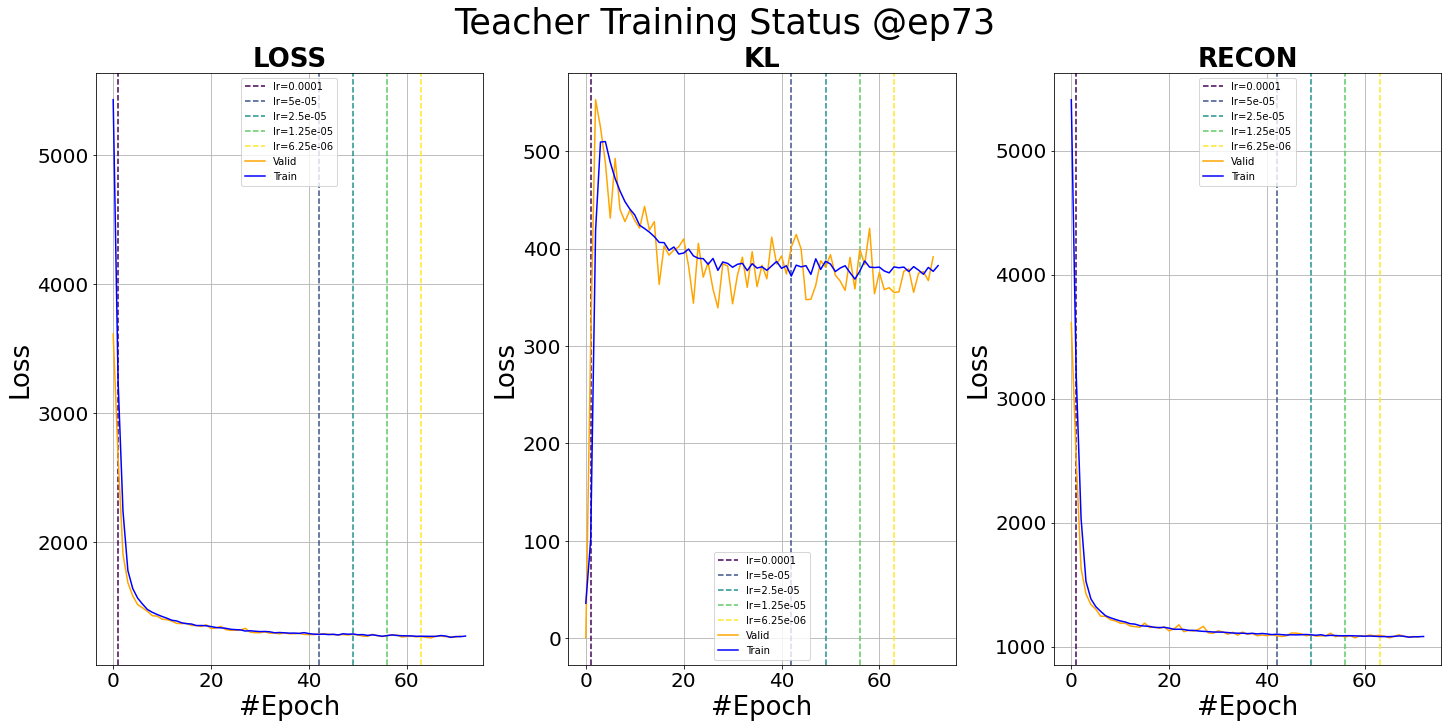

Teacher test: sample=65/68, loss=452.8571     
Test finished. Average loss={'LOSS': 1086.9547651515288, 'KL': 5.867742549408884, 'RECON': 1084.0208943486214}

Total training time: 18.19375443458557 sec


<Figure size 1440x720 with 0 Axes>

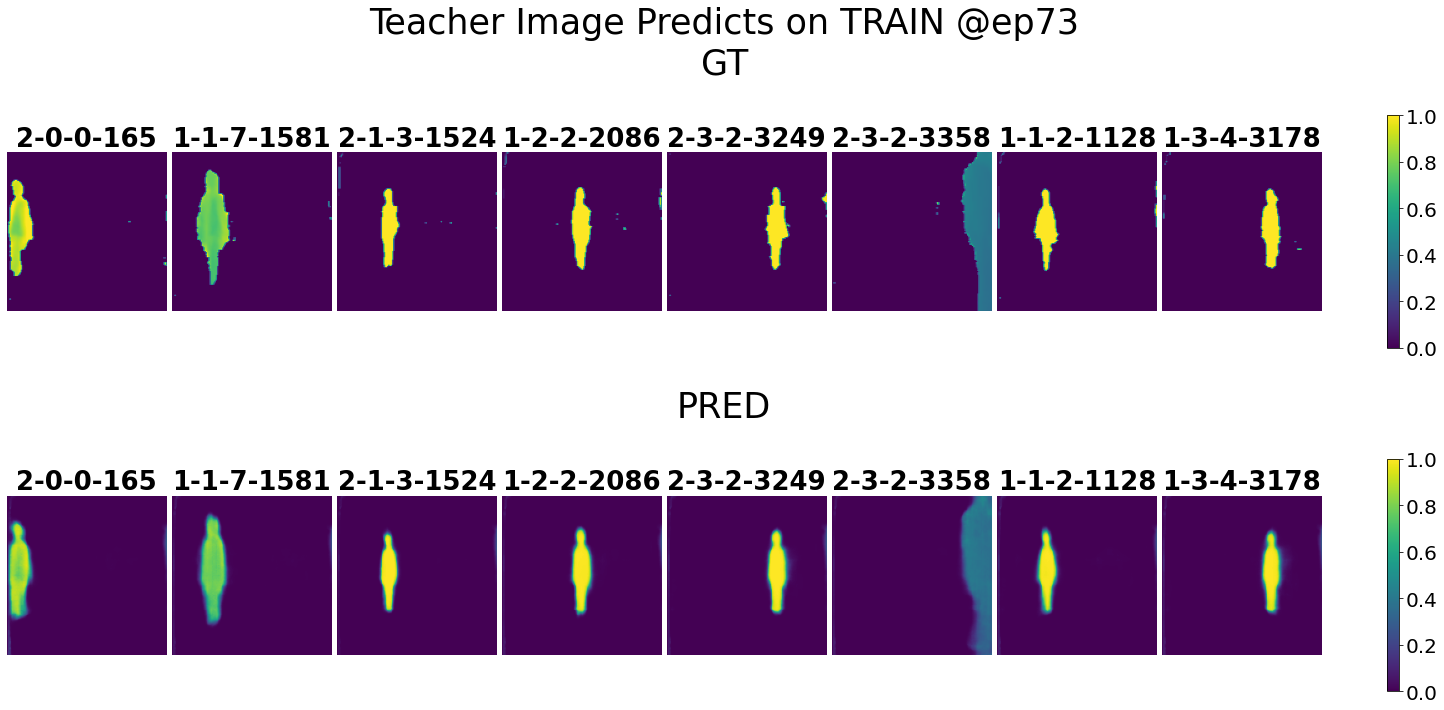

<Figure size 1440x720 with 0 Axes>

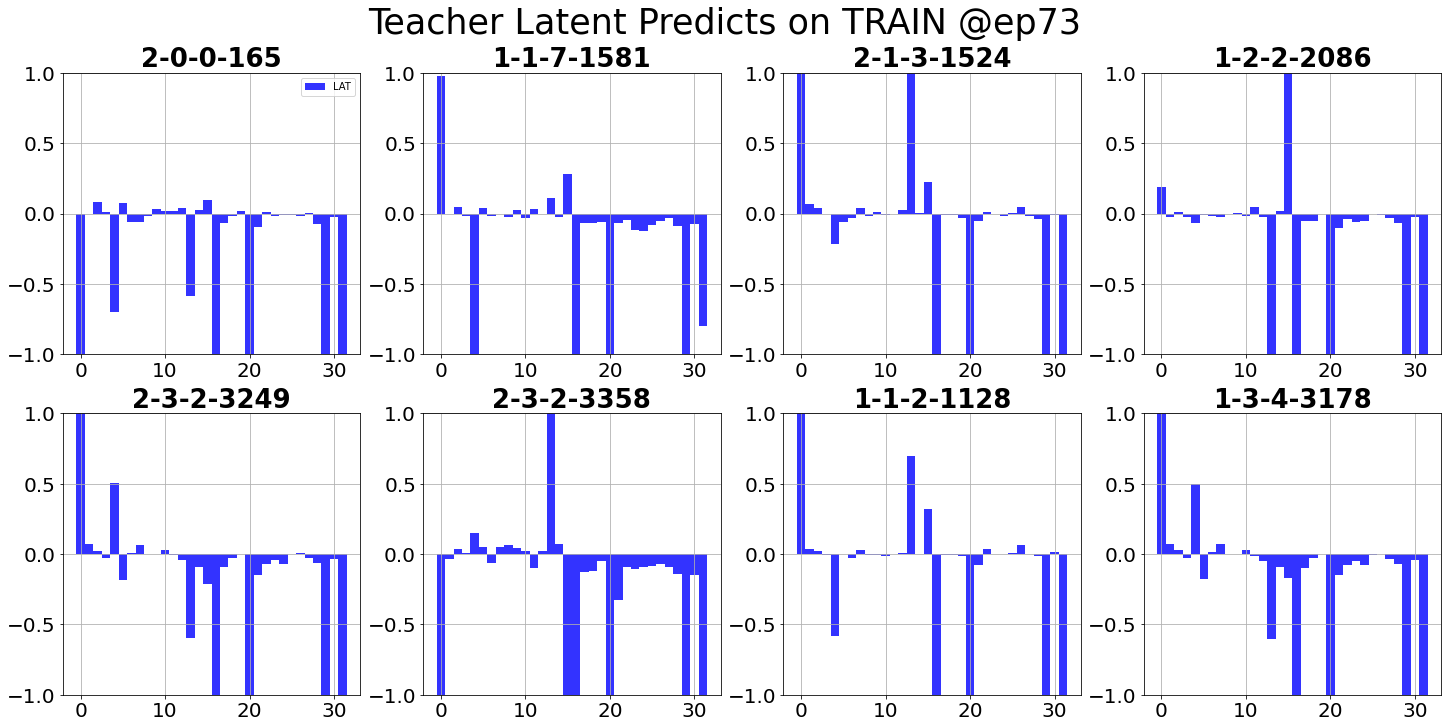

<Figure size 1440x720 with 0 Axes>

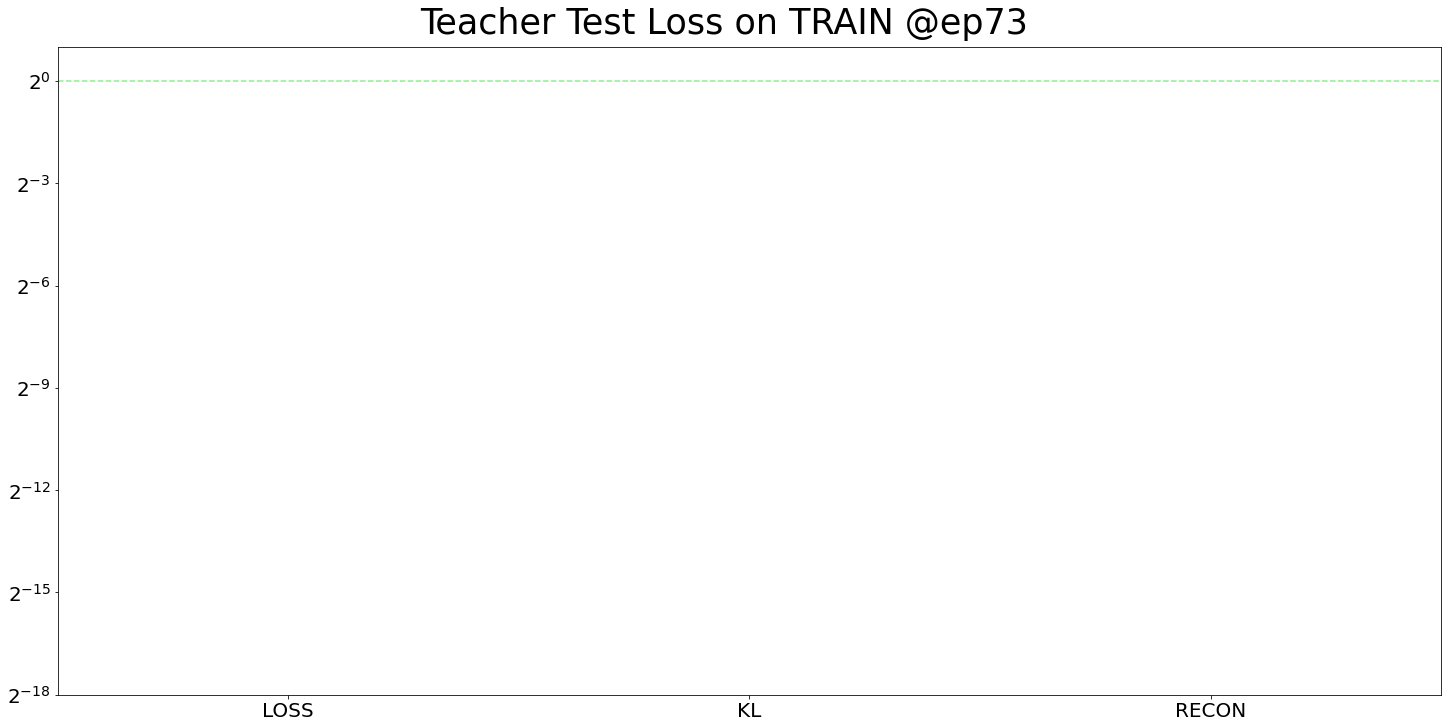

/home/bob/.local/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/bob/.local/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/home/bob/.local/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/bob/.local/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/home/bob/.local/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/bob/.local/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py

<Figure size 1440x720 with 0 Axes>

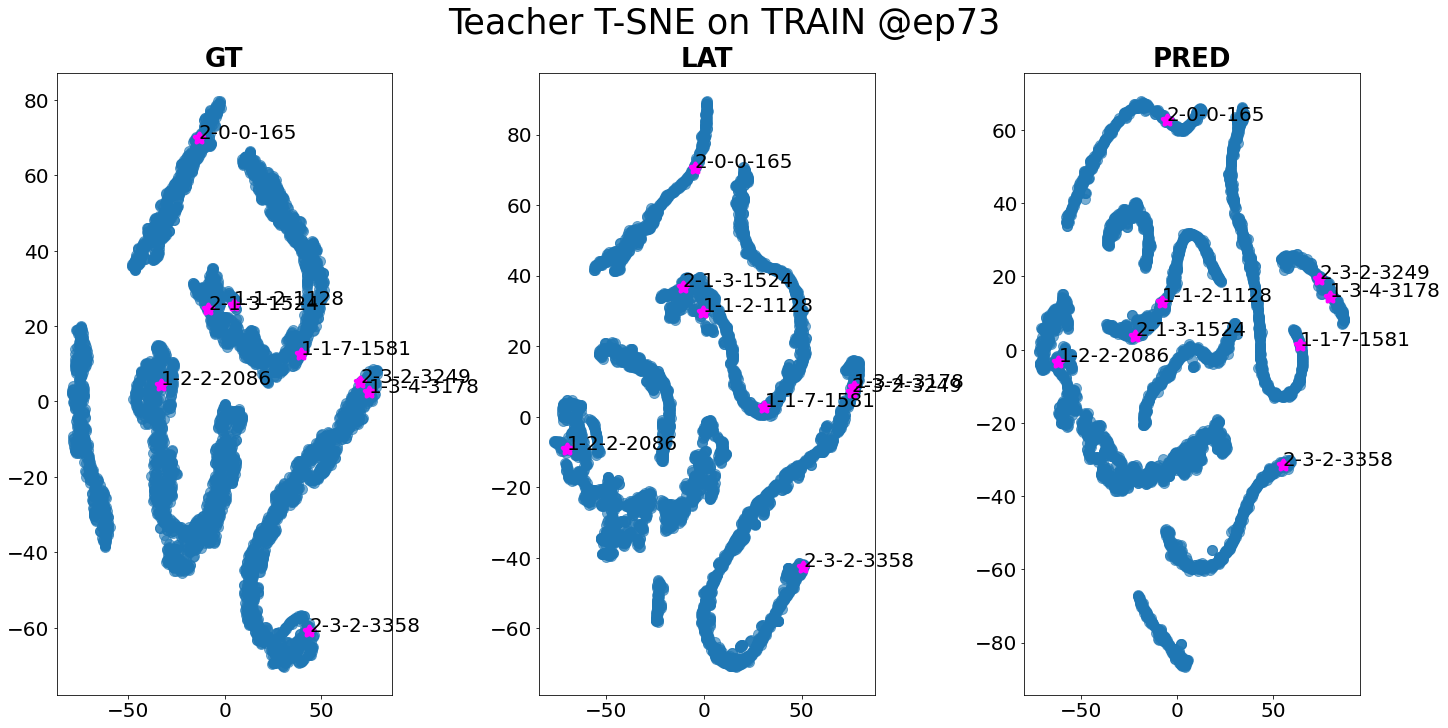

Teacher test: sample=5065/5069, loss=1074.0791     
Test finished. Average loss={'LOSS': 2453.502934250989, 'KL': 5.595167235759947, 'RECON': 2450.7053525544266}

Total training time: 32.55386519432068 sec


<Figure size 1440x720 with 0 Axes>

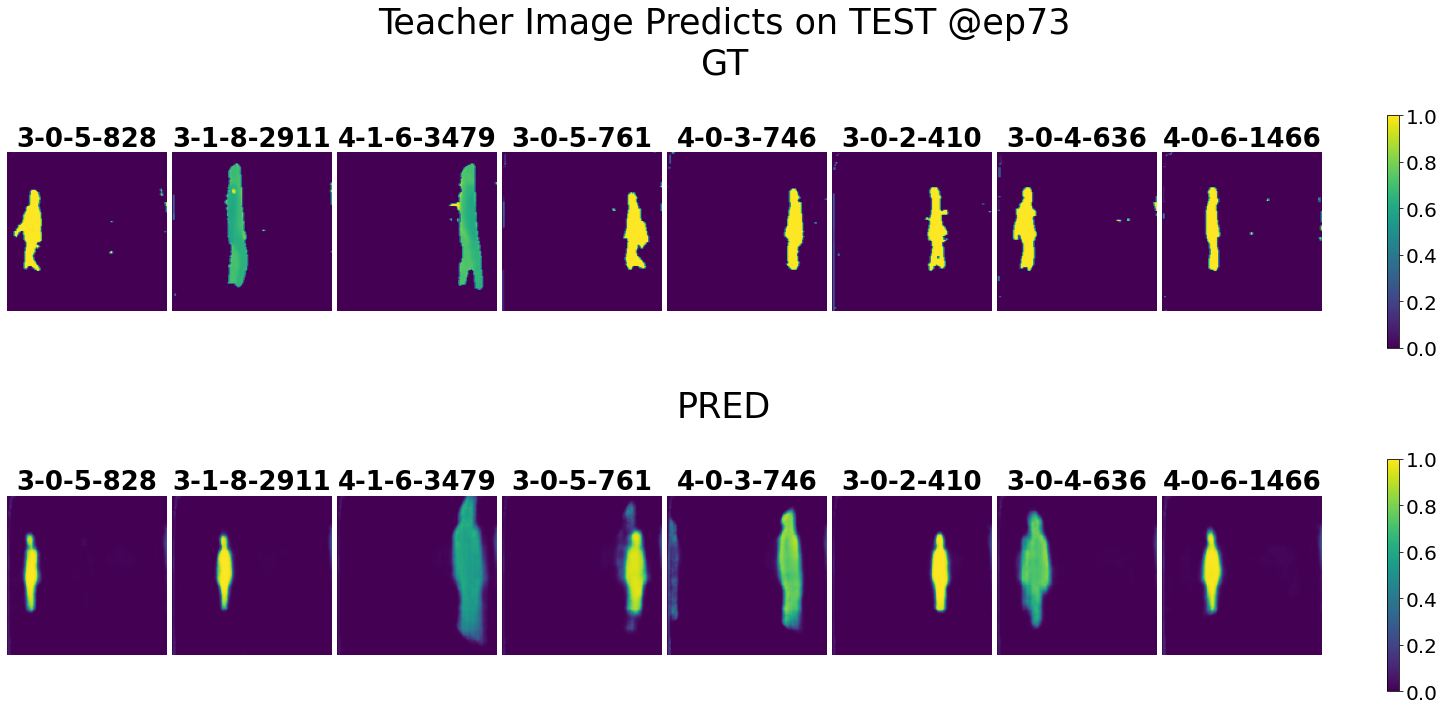

<Figure size 1440x720 with 0 Axes>

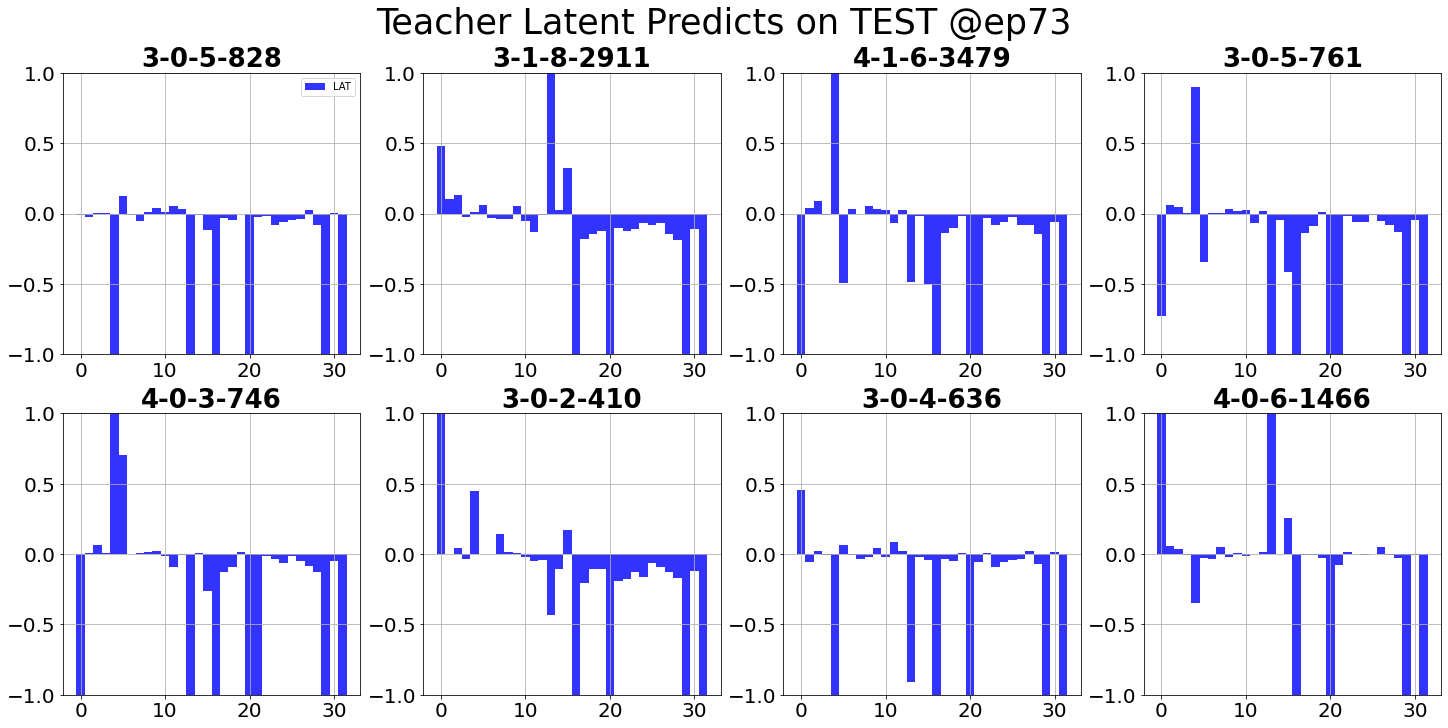

<Figure size 1440x720 with 0 Axes>

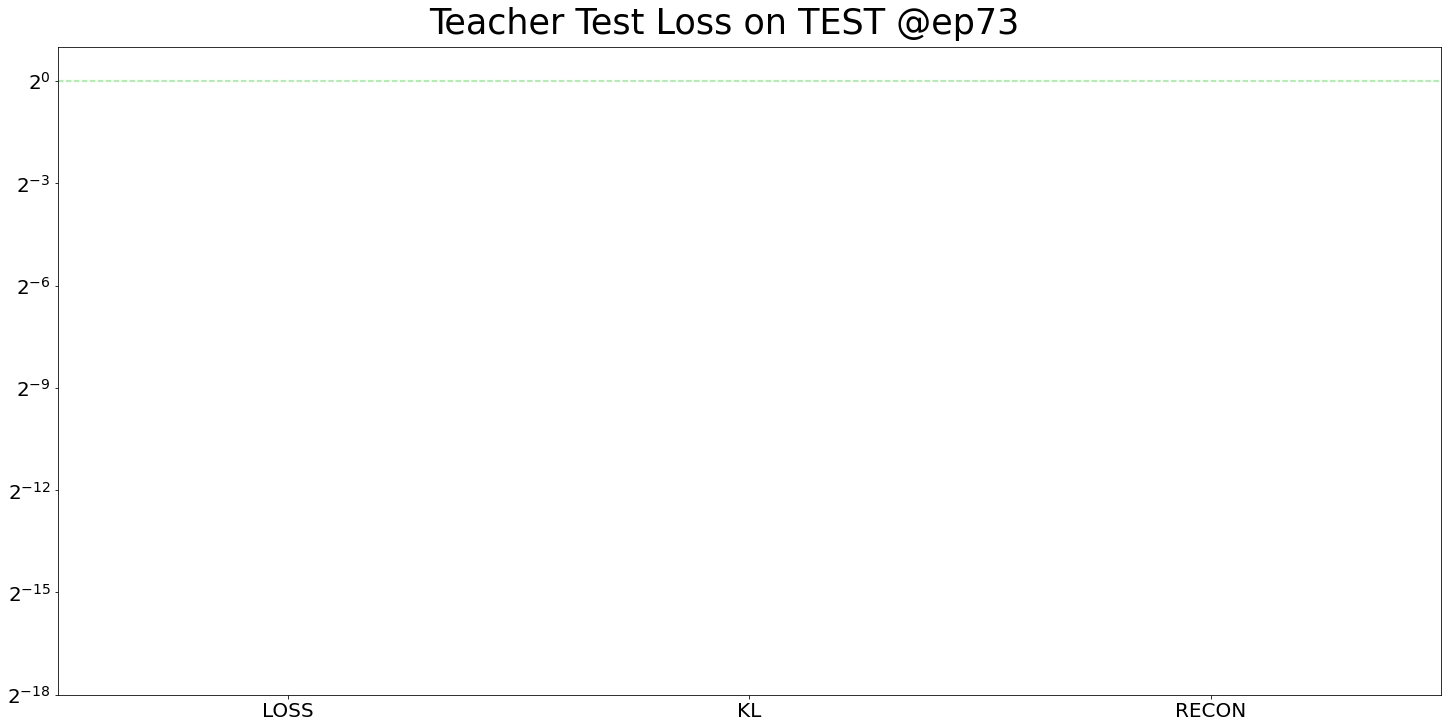

/home/bob/.local/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/bob/.local/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/home/bob/.local/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/bob/.local/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/home/bob/.local/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/bob/.local/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py

<Figure size 1440x720 with 0 Axes>

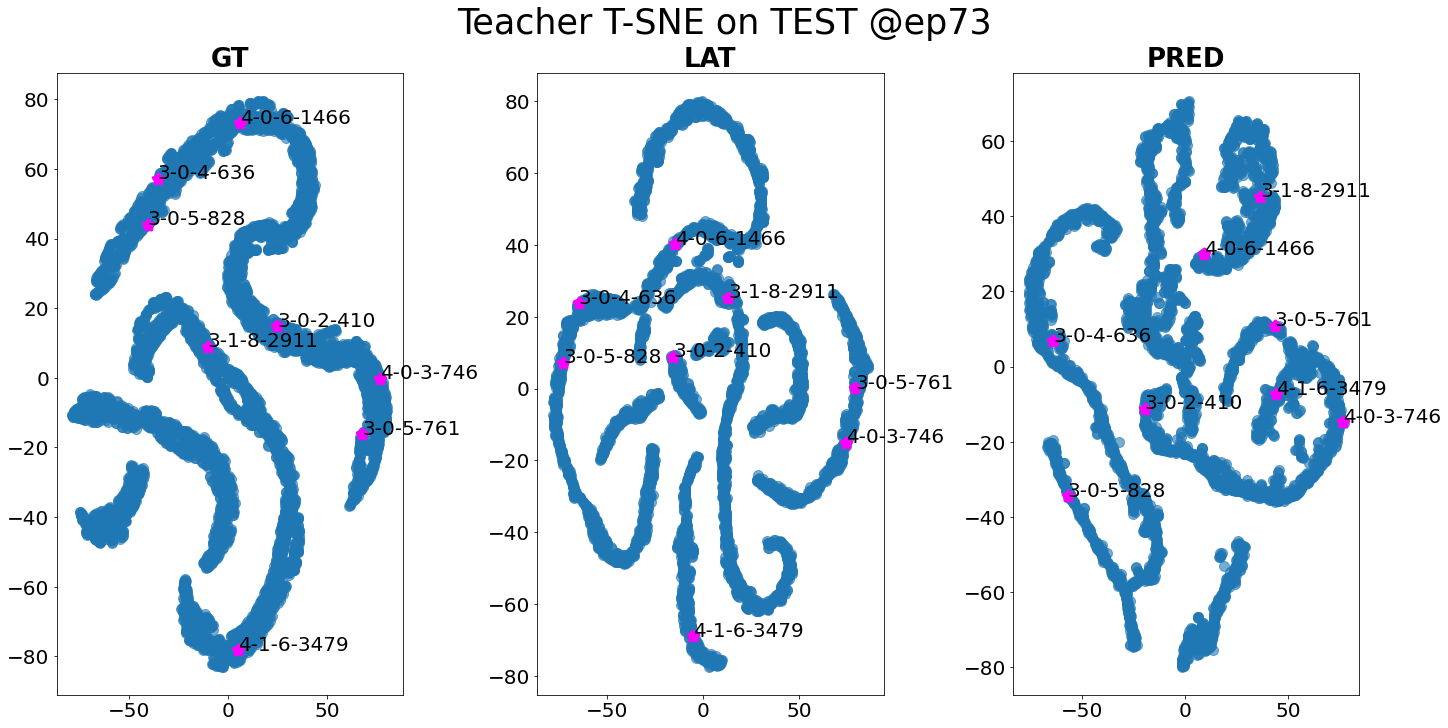

Saving pred including GT, PRED, LAT, TAG...Done

Teacher schedule Completed!


In [21]:
# Training and Testing
%matplotlib inline
tsvae_t_trained = TSVAE_T_trainer.schedule()

#### Student

In [4]:
import TrainerVTS_Comp as TP_TSVAE
csiencoder = TP_TSVAE.CSIEncoder(out_length=32)
#imgencoder = tsvae_t_trained['imgen']
#imgdecoder = tsvae_t_trained['imgde']
imgencoder = TP_TSVAE.ImageEncoder()
imgdecoder = TP_TSVAE.ImageDecoder()
imgencoder.load_state_dict(torch.load(f"../saved/240523TSVAE/Teacher_IMGENV06C1Comp_best.pth"))
imgdecoder.load_state_dict(torch.load(f"../saved/240523TSVAE/Teacher_IMGDEV06C1Comp_best.pth"))

TSVAE_S_trainer = TP_TSVAE.StudentTrainer(name='Student', mask=False,
                                         networks=[csiencoder, imgencoder, imgdecoder],
                                         lr=1e-4, epochs=10, cuda=gpu,
                                         train_loader=train_loader, valid_loader=valid_loader, test_loader=test_loader, notion=f'{date}TSVAE')

Student train: epoch=1/999, batch=0/68, loss=10.2926, current best valid loss=inf    
Student train: epoch=1/999, batch=5/68, loss=6.6982, current best valid loss=inf    
Student train: epoch=1/999, batch=10/68, loss=5.4895, current best valid loss=inf    
Student train: epoch=1/999, batch=15/68, loss=4.7388, current best valid loss=inf    
Student train: epoch=1/999, batch=20/68, loss=4.3767, current best valid loss=inf    
Student train: epoch=1/999, batch=25/68, loss=3.9760, current best valid loss=inf    
Student train: epoch=1/999, batch=30/68, loss=3.6770, current best valid loss=inf    
Student train: epoch=1/999, batch=35/68, loss=3.8068, current best valid loss=inf    
Student train: epoch=1/999, batch=40/68, loss=3.6917, current best valid loss=inf    
Student train: epoch=1/999, batch=45/68, loss=3.7153, current best valid loss=inf    
Student train: epoch=1/999, batch=50/68, loss=3.6294, current best valid loss=inf    
Student train: epoch=1/999, batch=55/68, loss=3.3299, c

<Figure size 432x288 with 0 Axes>

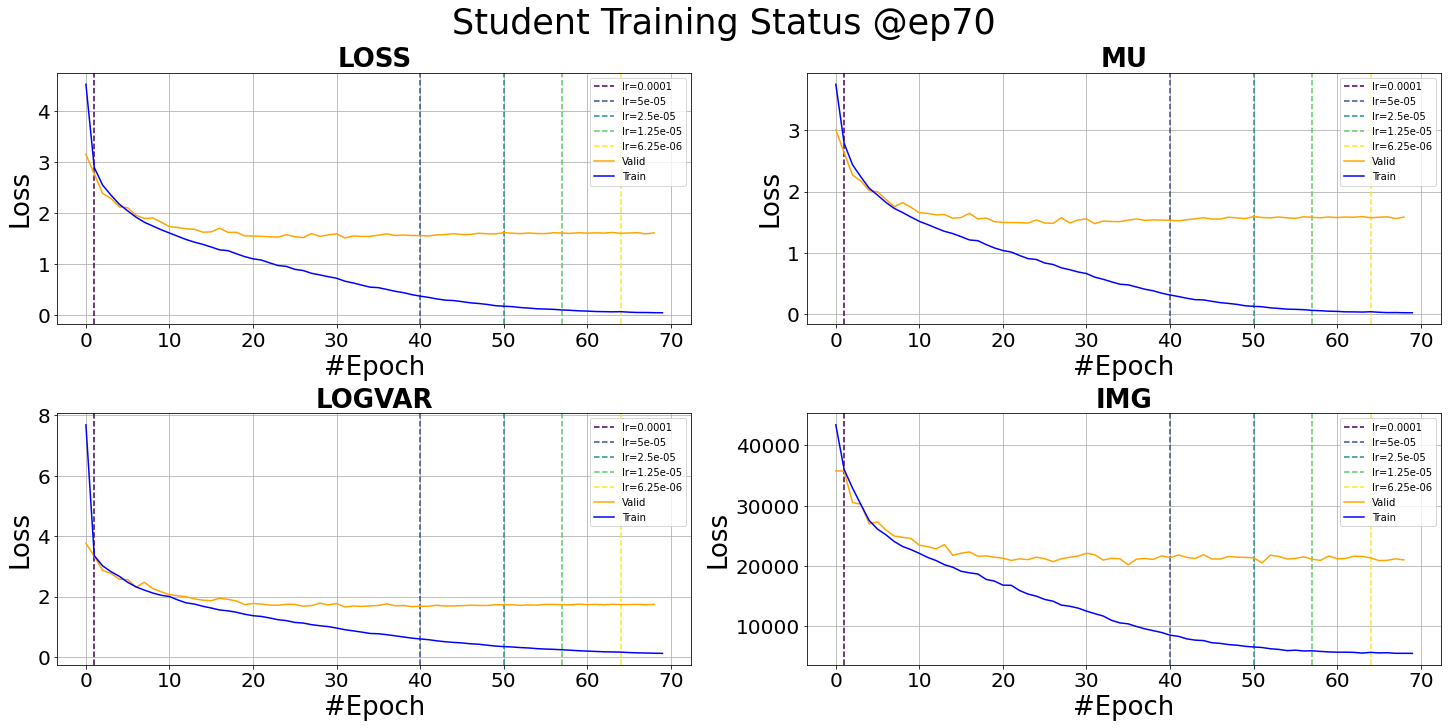

Student test: sample=65/68, loss=0.0280    
Test finished. Average loss={'LOSS': 0.044213998409545374, 'MU': 0.027060452858289435, 'LOGVAR': 0.11282817662525785, 'IMG': 84.71850098976317}

Total training time: 25.19355535507202 sec


<Figure size 1440x720 with 0 Axes>

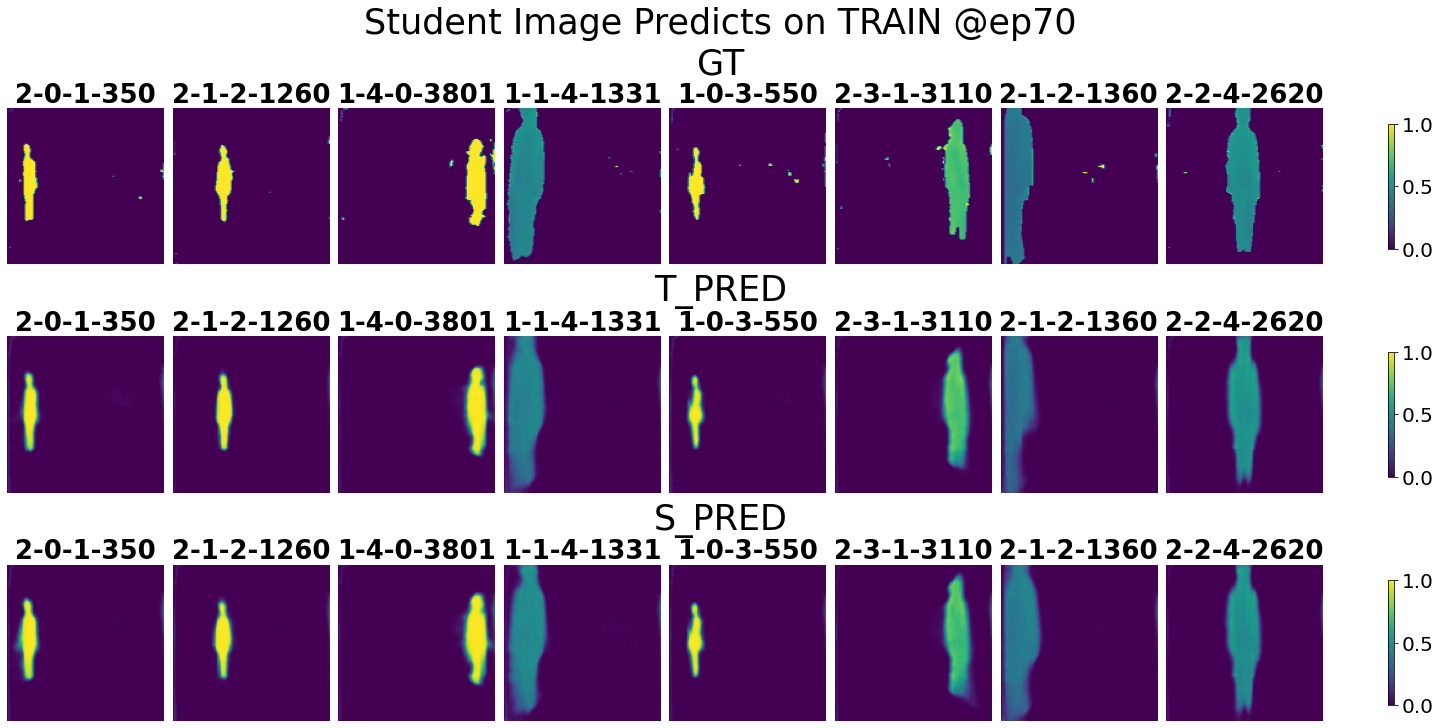

<Figure size 1440x720 with 0 Axes>

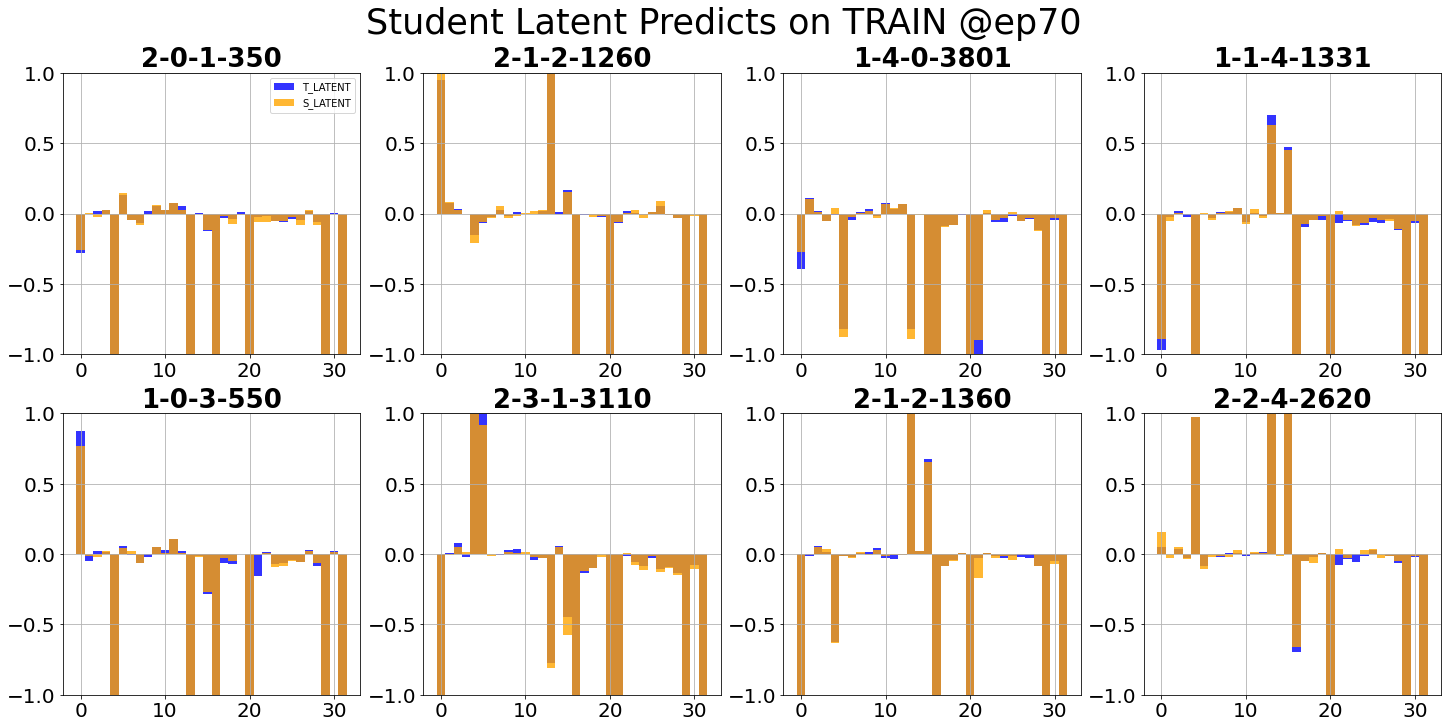

<Figure size 1440x720 with 0 Axes>

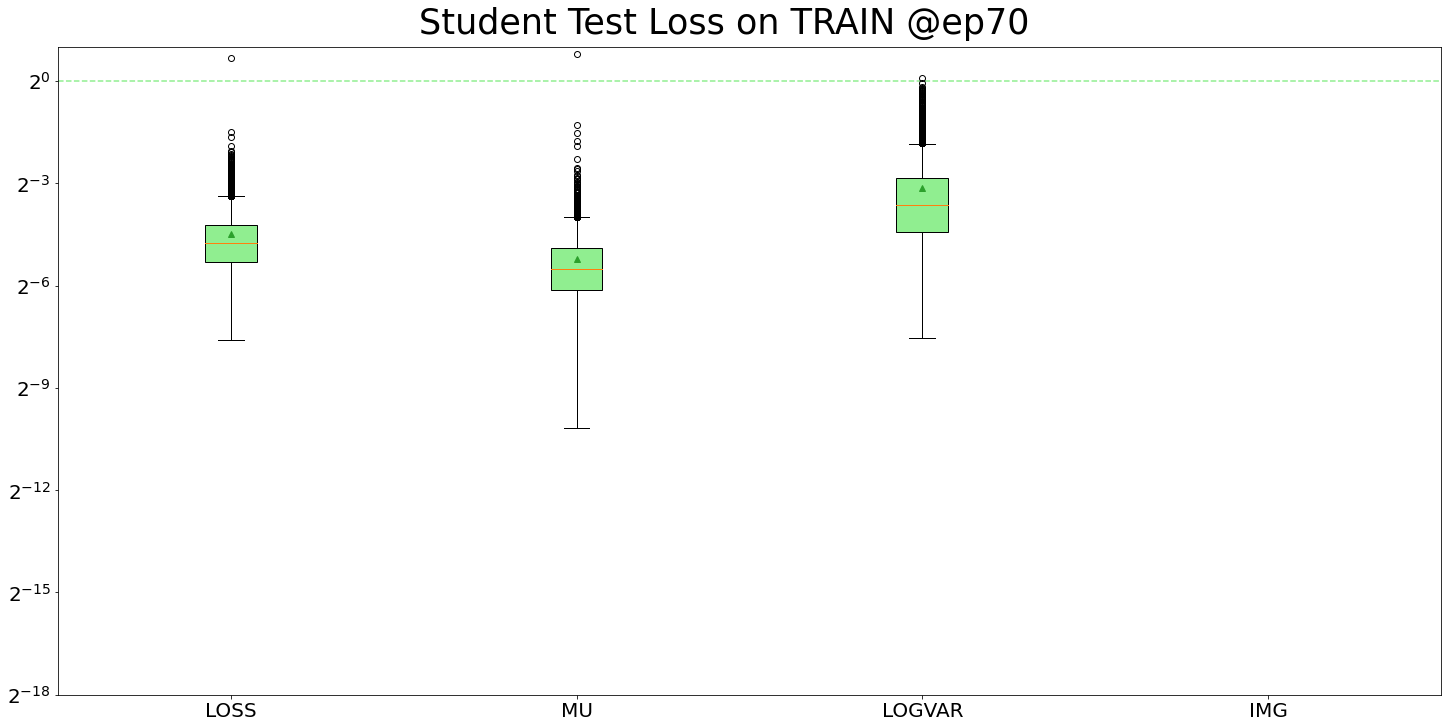

Student test: sample=5065/5069, loss=1.3427     
Test finished. Average loss={'LOSS': 3.194246613300571, 'MU': 3.049988061230072, 'LOGVAR': 3.77128054600295, 'IMG': 669.1627324823563}

Total training time: 40.965633392333984 sec


<Figure size 1440x720 with 0 Axes>

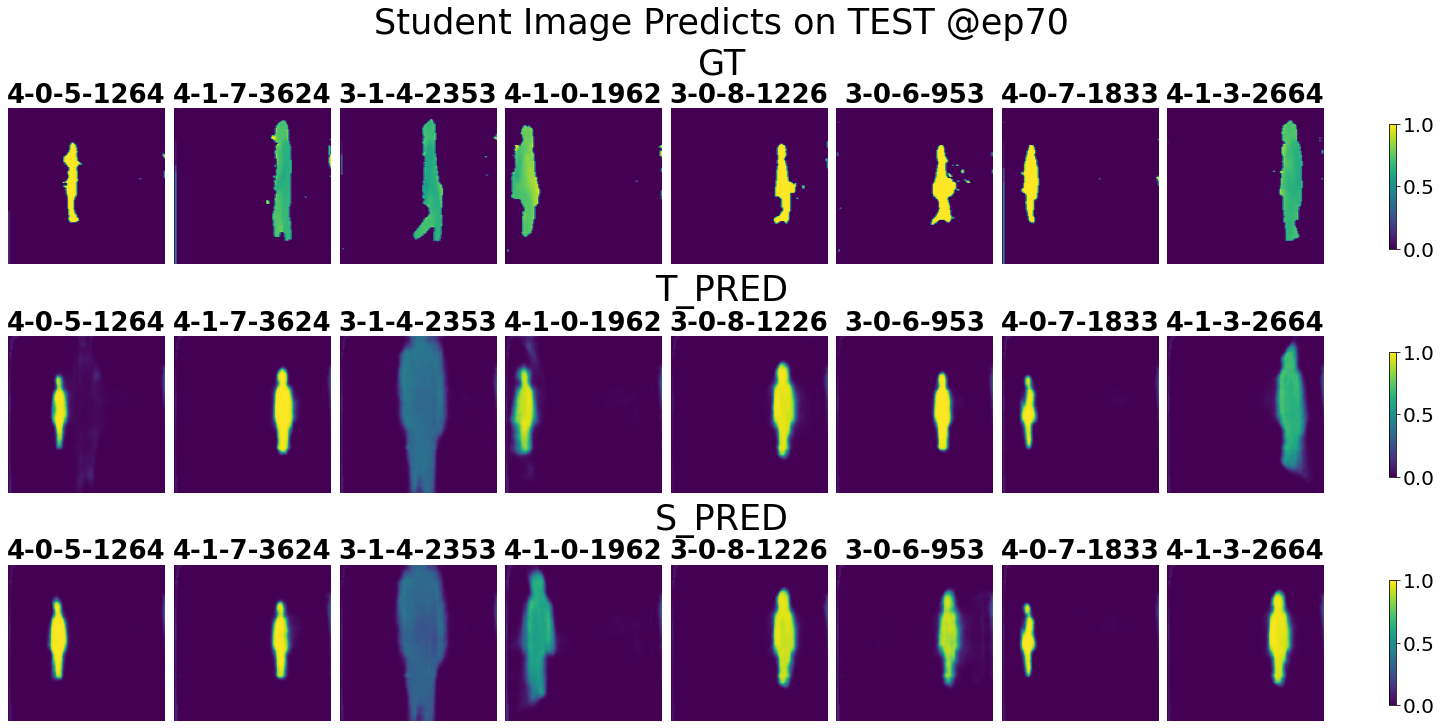

<Figure size 1440x720 with 0 Axes>

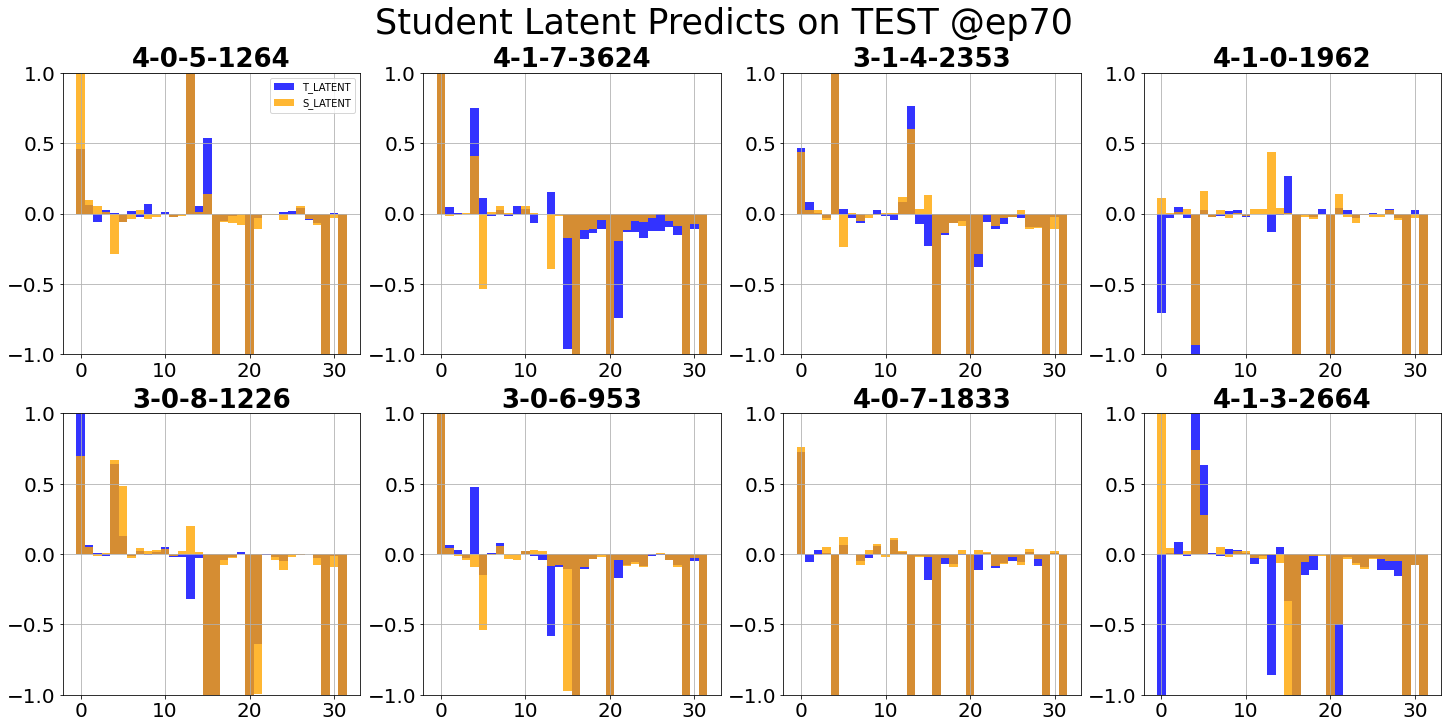

<Figure size 1440x720 with 0 Axes>

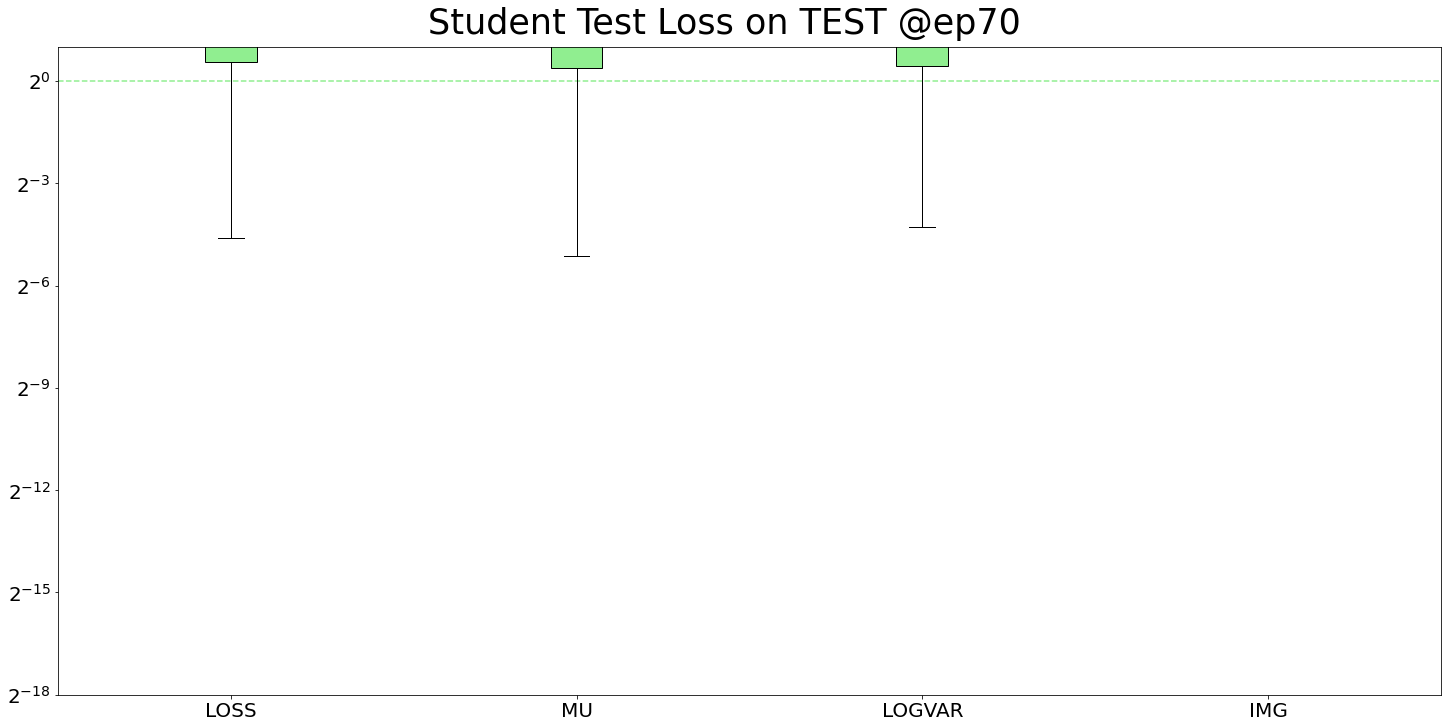

Saving pred including GT, T_PRED, S_PRED, T_LATENT, S_LATENT, TAG...Done

Student schedule Completed!


In [5]:
# Training and Testing
%matplotlib inline
tsvae_s_trained = TSVAE_S_trainer.schedule()